In [8]:
from keras.models import load_model
import pandas as pd

Using TensorFlow backend.


In [9]:
from keras_self_attention import SeqSelfAttention
model = load_model('weights-improvement-shuffle-40.hdf5',custom_objects={"SeqSelfAttention":SeqSelfAttention})

In [10]:
reviews = pd.read_table("amazon_data/sampled_reviews_small.tsv",error_bad_lines=False,low_memory=False)
reviews = reviews.sample(n=int(301555*0.2))

b'Skipping line 20114: expected 15 fields, saw 22\nSkipping line 36320: expected 15 fields, saw 22\nSkipping line 38067: expected 15 fields, saw 22\nSkipping line 40844: expected 15 fields, saw 22\nSkipping line 111102: expected 15 fields, saw 22\nSkipping line 128910: expected 15 fields, saw 22\n'


In [11]:
model.weights

[<tf.Variable 'bidirectional_2/forward_lstm_2/kernel:0' shape=(300, 512) dtype=float32, numpy=
 array([[ 0.05179726,  0.13039298, -0.32751402, ..., -0.1459374 ,
          0.45806688,  0.5086961 ],
        [ 0.28811342, -0.32180226,  0.4295506 , ..., -0.44335133,
         -0.70692736, -0.6197458 ],
        [-0.29962677,  0.19834095,  0.21407956, ..., -0.3278137 ,
         -0.3356702 ,  0.30258608],
        ...,
        [ 0.8793515 , -0.7406709 , -0.4254263 , ..., -0.4812801 ,
         -0.22614837, -1.1086092 ],
        [-0.34095672, -0.08308352, -0.51191026, ..., -0.02002433,
          0.02959628, -0.13556339],
        [-0.40262714,  0.66122776,  0.16552119, ..., -0.4982397 ,
         -0.4248432 , -0.7629627 ]], dtype=float32)>,
 <tf.Variable 'bidirectional_2/forward_lstm_2/recurrent_kernel:0' shape=(128, 512) dtype=float32, numpy=
 array([[ 3.3564571e-01, -3.8966481e-02, -1.1747859e+00, ...,
         -1.6734064e-01,  4.1455626e-01,  4.5702246e-01],
        [ 8.2760699e-02, -2.0355155e-

In [12]:
import seaborn
import numpy as np
import random
seaborn.set(rc={'figure.figsize':(24,16)})
def return_p(model):
    n = model.weights[-2].numpy()
    p = []
    for i in range(8):
        k = n[i*32:(i+1)*32]
        c = k[:]
        r =  np.random.shuffle(np.transpose(c))
        p.append(sum(k)/len(k))
        p.append(sum(k)/len(k))
    p_norm = np.around(np.abs(p - p.mean(0)) / p.ptp(0),1)
    return p_norm

seaborn.heatmap(return_p(model),annot=True,yticklabels=False,square=True,cbar_kws={"shrink": 0.25})

AttributeError: 'list' object has no attribute 'mean'

In [13]:
np.random.shuffle(np.transpose(c))

NameError: name 'c' is not defined

In [14]:
from keras_self_attention import SeqSelfAttention
model = load_model('weights-improvement-shuffle-01.hdf5',custom_objects={"SeqSelfAttention":SeqSelfAttention})

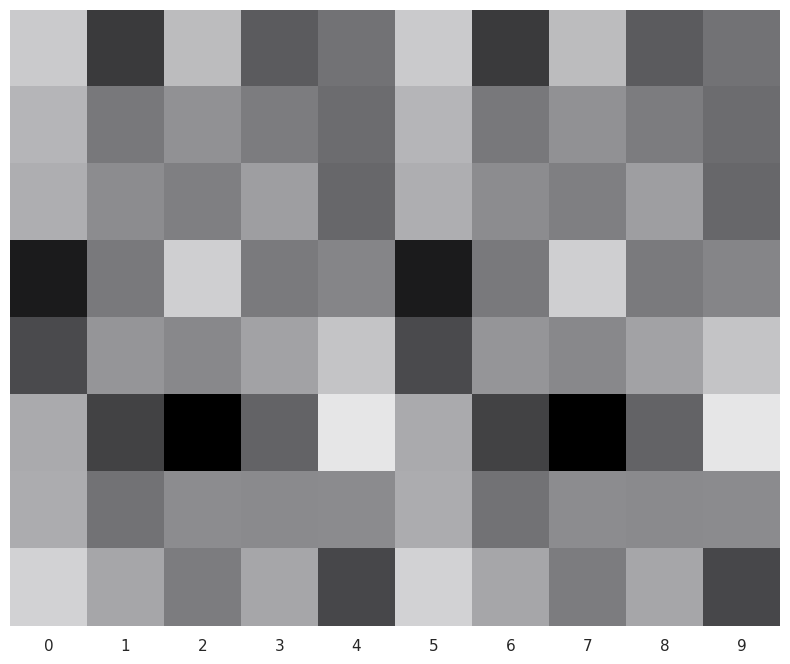

In [16]:
import seaborn
import numpy as np
seaborn.set(rc={'figure.figsize':(14,8)})
n = model.weights[-2].numpy()
p = []
for i in range(8):
    k = n[i*32:(i+1)*32]
    p.append(sum(k)/len(k))
p = np.array((p))
p = np.hstack([p,p])
p_norm = np.around(np.abs(p - p.mean(0)) / p.ptp(0),1)
cmap = seaborn.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
seaborn.heatmap(p,annot=False,yticklabels=False,square=True,cbar=0,cmap=cmap)

In [7]:
p_predicts, outputs = [],[]
i = 0
for ind,review in reviews.iterrows():
    predicted = np.argmax(results[1][i][-1,:])
    p_predicted = predicted
    for key, value in inverse_prod_category.items():
        if value == predicted:
            p_predicted = key
            break
    output = review["product_category"]
    outputs.append(output)
    p_predicts.append(p_predicted)
    print(p_predicted,output)
    i+=1

Personal_Care_Appliances Music
Personal_Care_Appliances Apparel
Automotive Baby
Personal_Care_Appliances Home
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Automotive
Personal_Care_Appliances Books
Personal_Care_Appliances Wireless
Personal_Care_Appliances Books
Personal_Care_Appliances Books
Personal_Care_Appliances Digital_Video_Download
Personal_Care_Appliances Music
Personal_Care_Appliances Camera
Personal_Care_Appliances Wireless
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances PC
Personal_Care_Appliances Music
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Office Products
Personal_Care_Appliances Major Appliances
Personal_Care_Appliances Books
Personal_Care_Appliances Kitchen
Personal_Care_Appliances Apparel
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Apparel
Personal_Care_Appliances Books
Personal_Care_Appl

Personal_Care_Appliances Books
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Books
Personal_Care_Appliances Beauty
Personal_Care_Appliances Digital_Video_Download
Automotive Apparel
Automotive Video DVD
Automotive Shoes
Automotive Wireless
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Sports
Personal_Care_Appliances Home Improvement
Personal_Care_Appliances Grocery
Personal_Care_Appliances Health & Personal Care
Automotive Furniture
Personal_Care_Appliances Kitchen
Personal_Care_Appliances Apparel
Personal_Care_Appliances Music
Automotive PC
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Wireless
Personal_Care_Appliances Music
Personal_Care_Appliances Music
Personal_Care_Appliances Home
Personal_Care_Appliances Beauty
Personal_Care_Appliances Books
Automotive Automotive
Automotive Apparel
Automotive Books
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Tools
Personal_Care_Appliances Books
Automo

Automotive Books
Personal_Care_Appliances Wireless
Personal_Care_Appliances PC
Personal_Care_Appliances Digital_Video_Download
Automotive Automotive
Personal_Care_Appliances Books
Automotive Pet Products
Personal_Care_Appliances Home
Personal_Care_Appliances Wireless
Personal_Care_Appliances Books
Automotive Furniture
Personal_Care_Appliances PC
Personal_Care_Appliances Wireless
Automotive Apparel
Personal_Care_Appliances Toys
Personal_Care_Appliances Mobile_Apps
Personal_Care_Appliances Books
Personal_Care_Appliances Automotive
Automotive Video Games
Automotive Electronics
Automotive Books
Personal_Care_Appliances Books
Personal_Care_Appliances Books
Personal_Care_Appliances Home Improvement
Personal_Care_Appliances Digital_Video_Download
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Books
Personal_Care_Appliances Jewelry
Personal_Care_Appliances PC
Personal_Care_Appliances Health & Personal Care
Automotive Digital_Ebook_Purchase
Automotive Lawn and Garden
Automotive Outd

Personal_Care_Appliances Video Games
Automotive Electronics
Automotive Video Games
Personal_Care_Appliances Outdoors
Automotive Music
Automotive Toys
Automotive Digital_Ebook_Purchase
Automotive PC
Automotive PC
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Health & Personal Care
Automotive Music
Personal_Care_Appliances Toys
Personal_Care_Appliances Wireless
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Sports
Personal_Care_Appliances Digital_Music_Purchase
Automotive Books
Personal_Care_Appliances Outdoors
Personal_Care_Appliances Kitchen
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Office Products
Personal_Care_Appliances Home
Personal_Care_Appliances Watches
Personal_Care_Appliances Books
Jewelry Digital_Ebook_Purchase
Automotive Lawn and Garden
Automotive Office Products
Automotive Automotive
Personal_Care_Appliances Beauty
Personal_Care_Appliances Home
Personal_Care_Appliances Mobile_Apps
Personal_Care_Appliances Books
Automo

Automotive Digital_Ebook_Purchase
Automotive Jewelry
Automotive Home
Personal_Care_Appliances Pet Products
Automotive Kitchen
Personal_Care_Appliances Grocery
Personal_Care_Appliances Sports
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Books
Mobile_Electronics Sports
Automotive Video Games
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Books
Personal_Care_Appliances PC
Automotive Video Games
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Books
Automotive PC
Personal_Care_Appliances Kitchen
Personal_Care_Appliances Wireless
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Grocery
Personal_Care_Appliances Automotive
Automotive Apparel
Automotive PC
Automotive Digital_Ebook_Purchase
Automotive PC
Personal_Care_Appliances Books
Personal_Care_Appliances Books
Personal_Care_Appliances Apparel
Automotive Digital_Music_Purchase
Personal_Care_Appliances Digital_Video_Download
Automotive Automotive
Automoti

Automotive Office Products
Personal_Care_Appliances Home
Personal_Care_Appliances Books
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Books
Personal_Care_Appliances Video
Automotive Beauty
Automotive Mobile_Apps
Personal_Care_Appliances Beauty
Personal_Care_Appliances Sports
Automotive Health & Personal Care
Personal_Care_Appliances Beauty
Personal_Care_Appliances Digital_Video_Download
Automotive Beauty
Personal_Care_Appliances Wireless
Personal_Care_Appliances Pet Products
Personal_Care_Appliances Wireless
Personal_Care_Appliances PC
Personal_Care_Appliances Gift Card
Automotive Apparel
Automotive Books
Personal_Care_Appliances Books
Personal_Care_Appliances Jewelry
Personal_Care_Appliances Books
Personal_Care_Appliances Wireless
Personal_Care_Appliances Home
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Wireless
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Baby
Automotive Apparel
Personal_Care_Appliances Books
Automotive Books
Pe

Automotive Apparel
Automotive Lawn and Garden
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Beauty
Automotive Wireless
Personal_Care_Appliances Kitchen
Automotive Beauty
Automotive Beauty
Personal_Care_Appliances Books
Personal_Care_Appliances Mobile_Apps
Automotive Electronics
Personal_Care_Appliances Wireless
Automotive Books
Automotive Wireless
Personal_Care_Appliances Shoes
Personal_Care_Appliances Books
Personal_Care_Appliances Health & Personal Care
Automotive Electronics
Personal_Care_Appliances Books
Personal_Care_Appliances Books
Automotive Video DVD
Automotive Apparel
Automotive Books
Personal_Care_Appliances Mobile_Apps
Automotive Office Products
Automotive Digital_Ebook_Purchase
Automotive Beauty
Personal_Care_Appliances PC
Automotive Pet Products
Jewelry Home Improvement
Automotive Electronics
Personal_Care_Appliances Books
Automotive Wireless
Personal_Care_Appliances Personal_Care_Appliances
Personal_Care_Appliances Books
Personal_Care_Appliance

Automotive Wireless
Personal_Care_Appliances Video DVD
Automotive Mobile_Apps
Personal_Care_Appliances Outdoors
Personal_Care_Appliances Home
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Mobile_Apps
Personal_Care_Appliances Books
Personal_Care_Appliances Digital_Video_Download
Automotive Home
Personal_Care_Appliances Kitchen
Personal_Care_Appliances Beauty
Automotive Music
Personal_Care_Appliances Baby
Automotive Toys
Automotive Digital_Video_Download
Personal_Care_Appliances Health & Personal Care
Personal_Care_Appliances Books
Personal_Care_Appliances Kitchen
Automotive Automotive
Personal_Care_Appliances Mobile_Apps
Personal_Care_Appliances Books
Personal_Care_Appliances Books
Automotive Wireless
Automotive Home
Personal_Care_Appliances Lawn and Garden
Automotive Wireless
Automotive Mobile_Apps
Automotive Office Products
Personal_Care_Appliances Wireless
Personal_Care_Appliances Sports
Automotive Music
Personal_Care_Appliances Books
Personal_Care_Appliances Video DVD
A

Personal_Care_Appliances Books
Automotive Digital_Video_Download
Automotive Mobile_Apps
Personal_Care_Appliances Shoes
Automotive Digital_Video_Download
Automotive Home Improvement
Personal_Care_Appliances Kitchen
Automotive Health & Personal Care
Automotive Pet Products
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Electronics
Automotive Toys
Automotive Lawn and Garden
Automotive Kitchen
Automotive Music
Personal_Care_Appliances Office Products
Automotive Health & Personal Care
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Home
Personal_Care_Appliances Books
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Mobile_Apps
Personal_Care_Appliances Books
Automotive Books
Personal_Care_Appliances Baby
Personal_Care_Appliances Books
Automotive Lawn and Garden
Personal_Care_Appliances Books
Automotive Books
Automotive Lawn and Garden
Personal_Care_Appliances Kitchen
Personal_Care_Appliances Sports
Personal_Care_Appliances Kitchen
Automotive Wir

Personal_Care_Appliances Outdoors
Automotive Home Improvement
Automotive Music
Automotive PC
Automotive Books
Automotive Digital_Ebook_Purchase
Automotive PC
Automotive Mobile_Apps
Automotive Watches
Personal_Care_Appliances Toys
Automotive PC
Personal_Care_Appliances Pet Products
Personal_Care_Appliances Health & Personal Care
Automotive Home
Automotive PC
Personal_Care_Appliances Electronics
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Shoes
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Wireless
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Health & Personal Care
Automotive PC
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Wireless
Automotive Automotive
Personal_Care_Appliances Books
Automotive Home Improvement
Automotive Music
Personal_Care_Appliances Music
Personal_Care_Appliances Music
Automotive Digital_Video_Games
Auto

Automotive PC
Mobile_Electronics Digital_Ebook_Purchase
Personal_Care_Appliances Shoes
Mobile_Electronics PC
Automotive PC
Automotive PC
Personal_Care_Appliances Mobile_Apps
Automotive Books
Personal_Care_Appliances Books
Automotive Digital_Ebook_Purchase
Automotive Mobile_Apps
Automotive Home Improvement
Personal_Care_Appliances Shoes
Personal_Care_Appliances PC
Automotive Wireless
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Outdoors
Automotive Lawn and Garden
Personal_Care_Appliances Books
Personal_Care_Appliances Beauty
Automotive Home
Personal_Care_Appliances Toys
Automotive Health & Personal Care
Automotive Beauty
Personal_Care_Appliances Automotive
Personal_Care_Appliances Books
Automotive Shoes
Automotive Toys
Automotive Digital_Video_Download
Automotive Beauty
Automotive Apparel
Mobile_Electronics Mo

Personal_Care_Appliances Music
Automotive Books
Automotive Toys
Personal_Care_Appliances Mobile_Apps
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Mobile_Apps
Personal_Care_Appliances Books
Personal_Care_Appliances Kitchen
Automotive Music
Personal_Care_Appliances PC
Automotive Digital_Ebook_Purchase
Automotive Home
Personal_Care_Appliances Apparel
Automotive Digital_Ebook_Purchase
Automotive Video DVD
Personal_Care_Appliances Home Improvement
Automotive Automotive
Automotive Sports
Automotive Video Games
Automotive Shoes
Automotive Health & Personal Care
Personal_Care_Appliances Grocery
Automotive Beauty
Automotive Books
Automotive Books
Personal_Care_Appliances Automotive
Automotive Kitchen
Personal_Care_Appliances PC
Automotive PC
Automotive PC
Automotive Books
Personal_Care_Appliances Automotive
Personal_Care_Appliances Automotive
Automotive PC
Automotive Personal_Care_Appliances
Personal_Care_Appliances Mobile_Apps
Personal_Care_Appliances Toys
Automotive Digital_Vide

Personal_Care_Appliances Digital_Video_Download
Automotive Home Improvement
Personal_Care_Appliances Lawn and Garden
Personal_Care_Appliances Home
Automotive Tools
Personal_Care_Appliances Video Games
Automotive Books
Automotive Home
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Books
Automotive Digital_Ebook_Purchase
Automotive Beauty
Automotive Books
Automotive Home Improvement
Automotive Kitchen
Automotive Grocery
Personal_Care_Appliances Books
Automotive Beauty
Automotive Music
Automotive Electronics
Automotive Lawn and Garden
Personal_Care_Appliances Health & Personal Care
Automotive Camera
Personal_Care_Appliances Kitchen
Automotive Outdoors
Automotive PC
Automotive Video DVD
Automotive Beauty
Personal_Care_Appliances Sports
Automotive Health & Personal Care
Automotive Digital_Music_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Lawn and Garden
Personal_Care_Appliances Digital_Ebook_Purchase
Persona

Automotive Home Entertainment
Automotive Books
Automotive Music
Automotive Baby
Automotive Lawn and Garden
Automotive Office Products
Automotive Home Improvement
Automotive Home Entertainment
Automotive Watches
Personal_Care_Appliances Sports
Personal_Care_Appliances Beauty
Automotive Shoes
Automotive Mobile_Apps
Personal_Care_Appliances Kitchen
Personal_Care_Appliances Sports
Automotive Books
Personal_Care_Appliances PC
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Lawn and Garden
Personal_Care_Appliances Music
Personal_Care_Appliances Kitchen
Automotive Books
Personal_Care_Appliances Music
Automotive Video DVD
Automotive Furniture
Automotive Books
Automotive Digital_Ebook_Purchase
Automotive Books
Automotive Digital_Ebook_Purchase
Automotive Home Improvement
Personal_Care_Appliances Digital_Video_Download
Automotive Mobile_Apps
Automotive Music
Automotive Health & Personal Care
Automotive Video DVD
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive 

Personal_Care_Appliances Lawn and Garden
Automotive Digital_Ebook_Purchase
Automotive Books
Personal_Care_Appliances Tools
Personal_Care_Appliances Books
Personal_Care_Appliances Wireless
Personal_Care_Appliances Outdoors
Automotive Camera
Automotive Watches
Personal_Care_Appliances Digital_Video_Download
Automotive Digital_Video_Download
Automotive Mobile_Apps
Automotive Camera
Automotive Beauty
Personal_Care_Appliances Baby
Automotive Wireless
Automotive Toys
Automotive Shoes
Automotive Home Entertainment
Automotive Beauty
Automotive Digital_Ebook_Purchase
Automotive Books
Automotive Digital_Ebook_Purchase
Automotive Video DVD
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Beauty
Automotive PC
Automotive Home
Automotive Software
Automotive Sports
Automotive Mobile_Apps
Automotive Mobile_Apps
Personal_Care_Appliances Apparel
Personal_Care_Appliances Mobile_Apps
Automotive Outdoors
Personal_Care_Appliances Toys
Personal_Care_Appliances Sports
Personal_Care_Appliances Wirele

Automotive Books
Automotive Mobile_Apps
Automotive Music
Automotive Home
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Sports
Automotive Wireless
Automotive PC
Personal_Care_Appliances Apparel
Automotive Digital_Ebook_Purchase
Automotive Toys
Automotive Automotive
Automotive Home
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Home
Personal_Care_Appliances Wireless
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Grocery
Automotive Sports
Personal_Care_Appliances Health & Personal Care
Personal_Care_Appliances Books
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Books
Personal_Care_Appliances Video Games
Personal_Care_Appliances Kitchen
Personal_Care_Appliances Pet Products
Personal_Care_Appliances Home
Automotive Digital_Ebook_Purchase
Automotive PC
Automotive PC
Jewelry Books
Automotive Toys
Automotive Digital_Ebook_Purchase
Automotive Mobile_Apps
Automotive Digital_Ebook_Purchase
Automotive Wireless
Personal_C

Personal_Care_Appliances Beauty
Automotive PC
Mobile_Electronics Baby
Automotive Books
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Outdoors
Automotive Electronics
Automotive Outdoors
Automotive Books
Personal_Care_Appliances Apparel
Automotive Digital_Video_Download
Personal_Care_Appliances Books
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Kitchen
Automotive Books
Personal_Care_Appliances Camera
Personal_Care_Appliances Health & Personal Care
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Mobile_Apps
Personal_Care_Appliances Digital_Video_Download
Mobile_Electronics PC
Personal_Care_Appliances Toys
Personal_Care_Appliances Apparel
Automotive Kitchen
Automotive PC
Automotive Pet Products
Personal_Care_Appliances Wireless
Automotive Books
Automotive PC
Automotive Video Games
Automotive Sports
Automotive Books
Personal_Care_Appliances Mobile_Apps
Automotive Shoes
Personal_Care_Appliances Shoes
Automotive Music
Personal_Care_Applianc

Automotive Books
Automotive Digital_Music_Purchase
Automotive Digital_Ebook_Purchase
Automotive Pet Products
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances PC
Personal_Care_Appliances Lawn and Garden
Personal_Care_Appliances Books
Personal_Care_Appliances Kitchen
Personal_Care_Appliances Video DVD
Automotive Music
Automotive Health & Personal Care
Automotive PC
Automotive Music
Personal_Care_Appliances Tools
Automotive Digital_Music_Purchase
Automotive PC
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Sports
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Wireless
Personal_Care_Appliances PC
Personal_Care_Appliances Music
Personal_Care_Appliances Grocery
Personal_Care_Appliances Beauty
Personal_Care_Appliances Jewelry
Personal_Care_Appliances Watches
Automotive PC
Automotive Shoes
Automotive Digital_Ebook_Purchase
Automotive Mobile_Apps
Automotive Shoes
Automotive Video DVD
Automotive Digital_Video_Download
Automotive Books
Automotive Di

Personal_Care_Appliances Baby
Automotive Health & Personal Care
Automotive Toys
Automotive Home Improvement
Automotive Tools
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Video
Automotive Books
Personal_Care_Appliances Books
Personal_Care_Appliances Software
Automotive Kitchen
Mobile_Electronics Digital_Ebook_Purchase
Personal_Care_Appliances Wireless
Personal_Care_Appliances Apparel
Personal_Care_Appliances Apparel
Automotive Pet Products
Personal_Care_Appliances Books
Personal_Care_Appliances Home
Personal_Care_Appliances Kitchen
Automotive Mobile_Apps
Automotive Jewelry
Automotive Jewelry
Automotive PC
Automotive Home Improvement
Automotive Shoes
Automotive Video DVD
Automotive Mobile_Apps
Automotive Office Products
Mobile_Electronics Wireless
Personal_Care_Appliances Books
Mobile_Electronics Grocery
Personal_Care_Appliances Office Products
Automotive Video DVD
Automotive Music
Automotive Digital_Ebook_Purchase
Automotive Toys
Automotive Books
Personal_Care_Appliances E

Personal_Care_Appliances PC
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Home
Automotive Automotive
Personal_Care_Appliances Home Improvement
Personal_Care_Appliances Books
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Automotive Grocery
Automotive Beauty
Automotive PC
Automotive Books
Automotive Apparel
Automotive Digital_Ebook_Purchase
Automotive Digital_Video_Download
Automotive Shoes
Personal_Care_Appliances PC
Personal_Care_Appliances Books
Mobile_Electronics Camera
Personal_Care_Appliances Kitchen
Automotive Music
Automotive Health & Personal Care
Automotive Baby
Automotive Books
Automotive Apparel
Personal_Care_Appliances Tools
Automotive Wireless
Automotive Musical Instruments
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Apparel
Personal_Care_Appliances Jewelry
Mobile_Electronics Digital_Video_Download
Personal_Care_Appliances Books
Persona

Automotive Music
Personal_Care_Appliances Video Games
Personal_Care_Appliances Books
Automotive Digital_Ebook_Purchase
Jewelry PC
Personal_Care_Appliances Apparel
Personal_Care_Appliances Jewelry
Personal_Care_Appliances Pet Products
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Tools
Personal_Care_Appliances Wireless
Personal_Care_Appliances Toys
Automotive Wireless
Mobile_Electronics Digital_Ebook_Purchase
Personal_Care_Appliances Home
Automotive Digital_Ebook_Purchase
Automotive Books
Automotive Digital_Music_Purchase
Automotive Apparel
Automotive Mobile_Apps
Automotive Wireless
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Wireless
Automotive Apparel
Automotive Health & Personal Care
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Outdoors
Personal_Care_Appliances Sports
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Books
Automotive Books
Automotive Digital_Ebook_Purchase
Personal_Ca

Automotive Automotive
Automotive Lawn and Garden
Personal_Care_Appliances Outdoors
Personal_Care_Appliances Books
Automotive Health & Personal Care
Automotive Kitchen
Personal_Care_Appliances Wireless
Automotive Office Products
Personal_Care_Appliances Books
Personal_Care_Appliances Home Improvement
Personal_Care_Appliances Books
Personal_Care_Appliances Jewelry
Jewelry Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Camera
Personal_Care_Appliances Books
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Camera
Automotive Health & Personal Care
Automotive Apparel
Automotive Home Improvement
Personal_Care_Appliances Books
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Kitchen
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Jewelry
Personal_Care_Appliances Beauty
Personal_Care_Appliances Music
Personal_Care_Appliances Jewelry
Personal_Care_Appliances Pet Products
Personal_Care_Appliances Digital_

Automotive Jewelry
Automotive Wireless
Automotive Jewelry
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Pet Products
Jewelry Home
Automotive Books
Automotive Sports
Mobile_Electronics Kitchen
Automotive Wireless
Automotive Home
Automotive Books
Personal_Care_Appliances Automotive
Personal_Care_Appliances Kitchen
Personal_Care_Appliances Apparel
Personal_Care_Appliances Shoes
Automotive Automotive
Personal_Care_Appliances Books
Automotive Music
Personal_Care_Appliances Books
Personal_Care_Appliances Pet Products
Personal_Care_Appliances Digital_Video_Download
Personal_Care_Appliances Pet Products
Personal_Care_Appliances Music
Personal_Care_Appliances Music
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Books
Mobile_Electronics Mobile_Apps
Personal_Care_Appliances Pet Products
Automotive Wireless
Automotive Beauty
Personal_Care_Appliances Beauty
Automotive Electronics
Personal_Care_Appliances Digital_Music_Purchase
Automotive Apparel
Personal_Care_

Automotive Books
Automotive Books
Automotive Toys
Personal_Care_Appliances Home Improvement
Personal_Care_Appliances PC
Jewelry Books
Automotive Grocery
Automotive Wireless
Personal_Care_Appliances Kitchen
Automotive Books
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive PC
Automotive Digital_Ebook_Purchase
Automotive Digital_Video_Download
Automotive Wireless
Personal_Care_Appliances Home Improvement
Automotive Camera
Personal_Care_Appliances Wireless
Automotive Digital_Video_Download
Automotive Digital_Music_Purchase
Personal_Care_Appliances Tools
Personal_Care_Appliances Mobile_Apps
Personal_Care_Appliances Outdoors
Automotive Watches
Personal_Care_Appliances PC
Personal_Care_Appliances Apparel
Personal_Care_Appliances Mobile_Apps
Automotive PC
Personal_Care_Appliances Camera
Automotive Mobile_Apps
Automotive Home
Personal_Care_Appliances Books
Automotive Shoes
Automotive Mobile_Apps
Automotive Health & Personal Care
Personal_Care_Appliances Shoes
Automotive Books
Jewelry 

Personal_Care_Appliances Apparel
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Mobile_Apps
Automotive Electronics
Personal_Care_Appliances Electronics
Automotive Pet Products
Automotive Books
Automotive Health & Personal Care
Automotive Digital_Ebook_Purchase
Automotive Books
Automotive Pet Products
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Video_Download
Automotive Home
Automotive Music
Automotive Kitchen
Personal_Care_Appliances Pet Products
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Books
Automotive Apparel
Automotive PC
Automotive Digital_Ebook_Purchase
Automotive PC
Personal_Care_Appliances Digital_Music_Purchase
Personal_Care_Appliances Beauty
Personal_Care_Appliances Lawn and Garden
Automotive Wireless
Automotive Sports
Personal_Care_Appliances Beauty
Personal_Care_Appliances Shoes
Personal_Care_Appliances Automotive
Automotive Mobile_Apps
Personal_Care_Appliances Kitchen
Automotive D

Personal_Care_Appliances Apparel
Automotive Digital_Ebook_Purchase
Automotive Books
Automotive Mobile_Apps
Personal_Care_Appliances Digital_Music_Purchase
Personal_Care_Appliances Books
Automotive Electronics
Automotive Mobile_Apps
Automotive Wireless
Personal_Care_Appliances Luggage
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Sports
Personal_Care_Appliances Grocery
Automotive PC
Personal_Care_Appliances Apparel
Automotive Apparel
Personal_Care_Appliances Books
Automotive Apparel
Personal_Care_Appliances Shoes
Automotive Toys
Automotive Health & Personal Care
Personal_Care_Appliances Books
Automotive Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Video
Personal_Care_Appliances Books
Personal_Care_Appliances Music
Automotive Automotive
Automotive Watches
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Outdoors
Personal_Care_Appliances Grocery
Personal_Care_Appliances Music
Automotive Toys
Automotive Pet Products


Automotive Digital_Video_Download
Automotive Office Products
Personal_Care_Appliances Office Products
Personal_Care_Appliances Apparel
Personal_Care_Appliances Electronics
Automotive Home Improvement
Personal_Care_Appliances Lawn and Garden
Personal_Care_Appliances Wireless
Personal_Care_Appliances Beauty
Automotive Books
Personal_Care_Appliances Video DVD
Automotive Music
Personal_Care_Appliances Health & Personal Care
Personal_Care_Appliances Luggage
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Mobile_Apps
Personal_Care_Appliances Home Improvement
Automotive Lawn and Garden
Automotive Health & Personal Care
Personal_Care_Appliances Video DVD
Automotive Digital_Ebook_Purchase
Automotive Digital_Video_Download
Automotive Health & Personal Care
Personal_Care_Appliances Wireless
Personal_Care_Appliances Shoes
Automotive Digital_Ebook_Purchase
Automotive Tools
Automotive Books
Personal_Care_Appliances Furniture
Personal_Care_Appliances Sports
Personal_Care_Appliances Beauty


Automotive Beauty
Automotive Watches
Automotive Digital_Ebook_Purchase
Automotive Office Products
Automotive Jewelry
Jewelry Digital_Ebook_Purchase
Automotive Books
Automotive Video Games
Automotive PC
Personal_Care_Appliances Wireless
Personal_Care_Appliances Toys
Automotive Wireless
Personal_Care_Appliances Tools
Automotive Beauty
Automotive Books
Personal_Care_Appliances Music
Personal_Care_Appliances Beauty
Automotive Books
Personal_Care_Appliances Jewelry
Automotive Electronics
Personal_Care_Appliances Toys
Automotive Books
Personal_Care_Appliances Wireless
Automotive Kitchen
Personal_Care_Appliances Wireless
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Furniture
Automotive Apparel
Personal_Care_Appliances Books
Personal_Care_Appliances Beauty
Automotive Apparel
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Lawn and Garden
Automotive Music
Automotive Health & Personal Care
Personal_Care_Appliances Beauty
Au

Automotive Wireless
Personal_Care_Appliances Electronics
Automotive Kitchen
Automotive Baby
Personal_Care_Appliances Home Improvement
Personal_Care_Appliances Outdoors
Automotive Video DVD
Personal_Care_Appliances Shoes
Automotive Camera
Personal_Care_Appliances Apparel
Automotive Video DVD
Personal_Care_Appliances Toys
Personal_Care_Appliances Automotive
Personal_Care_Appliances Office Products
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Music
Automotive Video DVD
Personal_Care_Appliances Camera
Personal_Care_Appliances Digital_Video_Download
Automotive Grocery
Personal_Care_Appliances Books
Automotive Apparel
Personal_Care_Appliances Beauty
Automotive Office Products
Personal_Care_Appliances Wireless
Personal_Care_Appliances Shoes
Jewelry Health & Personal Care
Automotive Wireless
Automotive Watches
Automotive Beauty
Personal_Care_Appliances Music
Personal_Care_Appliances Office Products
Automotive Shoes
Personal_Care_Appliances Video DVD
Automotive Digital_Ebook_Purch

Automotive Shoes
Automotive Wireless
Personal_Care_Appliances Wireless
Personal_Care_Appliances Mobile_Apps
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive PC
Personal_Care_Appliances Health & Personal Care
Personal_Care_Appliances Health & Personal Care
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Automotive
Mobile_Electronics Kitchen
Personal_Care_Appliances Shoes
Automotive Tools
Personal_Care_Appliances Music
Automotive Video DVD
Personal_Care_Appliances Books
Personal_Care_Appliances Video DVD
Automotive Digital_Ebook_Purchase
Automotive PC
Automotive Apparel
Personal_Care_Appliances Beauty
Automotive Sports
Personal_Care_Appliances Shoes
Personal_Care_Appliances Apparel
Jewelry Apparel
Automotive Musical Instruments
Automotive Electronics
Personal_Care_Appliances Sports
Automotive Books
Personal_Care_Appliances Digital_Music_Purchase
Automotive Music
Personal_Care_Appliances Automotive
Automotive Sports
Automotive Beauty
Personal_Care_Appliances Sports
Au

Personal_Care_Appliances Books
Personal_Care_Appliances Electronics
Automotive Tools
Personal_Care_Appliances Apparel
Automotive PC
Personal_Care_Appliances Books
Automotive Pet Products
Personal_Care_Appliances Home
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Pet Products
Personal_Care_Appliances Digital_Video_Games
Automotive Books
Personal_Care_Appliances Wireless
Automotive Shoes
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Books
Personal_Care_Appliances Pet Products
Automotive Tools
Automotive Music
Personal_Care_Appliances Apparel
Mobile_Electronics Books
Personal_Care_Appliances Digital_Video_Download
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances PC
Automotive Digital_Ebook_Purchase
Automotive Beauty
Personal_Care_Appliances Home
Personal_Care_Appliances Books
Automotive Sports
Automotive Books
Automotive Wireless
Personal_Care_Appliances Digital_Video_Download
Personal_Care_Appliances Electronics
Personal_Care_Appliances Lawn and Garden

Automotive Toys
Personal_Care_Appliances Office Products
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Jewelry
Automotive Health & Personal Care
Automotive Beauty
Personal_Care_Appliances Books
Automotive Kitchen
Personal_Care_Appliances Kitchen
Automotive Electronics
Automotive Books
Personal_Care_Appliances PC
Jewelry Books
Automotive Books
Automotive Video DVD
Personal_Care_Appliances Beauty
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Books
Automotive Grocery
Personal_Care_Appliances Health & Personal Care
Automotive Home Improvement
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Home
Automotive Digital_Ebook_Purchase
Automotive Electronics
Automotive Musical Instruments
Personal_Care_Appliances Electronics
Personal_Care_Appliances PC
Personal_Care_Appliances Kitchen
Automotive Kitchen
Personal_Care_Appliances Books
Automotive Books
Personal_Care_Appliances Home
Automotive Toys
Personal_Care_Appliances Jewelr

Automotive Digital_Video_Download
Automotive Sports
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Apparel
Personal_Care_Appliances Books
Personal_Care_Appliances Baby
Personal_Care_Appliances Books
Personal_Care_Appliances Pet Products
Automotive Home
Personal_Care_Appliances Office Products
Automotive Apparel
Personal_Care_Appliances Mobile_Apps
Automotive Video DVD
Automotive Books
Personal_Care_Appliances Home
Automotive Health & Personal Care
Personal_Care_Appliances Health & Personal Care
Automotive Sports
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Toys
Jewelry Digital_Ebook_Purchase
Automotive Toys
Personal_Care_Appliances Beauty
Personal_Care_Appliances Tools
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Electronics
Automotive Digital_Video_Download
Jewelry Beauty
Personal_Care_Appliances Automotive
Automotive PC
Personal_Care_Appliances PC
Personal_Care_Appliances Video DVD
Automotive Digital_Ebook_Purchase
Automotive Pet Products
Auto

Automotive Shoes
Personal_Care_Appliances Books
Automotive Apparel
Automotive Home
Personal_Care_Appliances Home Improvement
Personal_Care_Appliances Books
Automotive Mobile_Apps
Automotive Digital_Ebook_Purchase
Automotive Wireless
Personal_Care_Appliances Office Products
Automotive PC
Personal_Care_Appliances Books
Automotive Music
Personal_Care_Appliances Video Games
Automotive Baby
Personal_Care_Appliances PC
Automotive Books
Personal_Care_Appliances Camera
Automotive Wireless
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Electronics
Automotive Digital_Video_Download
Personal_Care_Appliances PC
Automotive Digital_Music_Purchase
Automotive Kitchen
Personal_Care_Appliances Wireless
Jewelry Digital_Ebook_Purchase
Automotive Tools
Automotive Digital_Video_Games
Personal_Care_Appliances Sports
Automotive Pet Products
Personal_Care_Appliances Sports
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Tools
Personal_Care_Appliances Music
Personal_Care_Appliances Books


Personal_Care_Appliances Toys
Personal_Care_Appliances Toys
Automotive Digital_Ebook_Purchase
Automotive Home
Automotive Musical Instruments
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Books
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Home Improvement
Automotive Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Video_Download
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Electronics
Automotive Wireless
Automotive Toys
Personal_Care_Appliances Digital_Video_Download
Automotive Books
Personal_Care_Appliances Books
Automotive Baby
Automotive Shoes
Automotive Apparel
Jewelry Electronics
Automotive Health & Personal Care
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Books
Automotive Furniture
Personal_Care_Appliances Automotive
Automotive Pet Products
Personal_Care_Appliances Shoes
Automotive Sports
Automotive Shoes
Personal_Care_Appliances Major Appliances
Personal_Ca

Personal_Care_Appliances Apparel
Automotive Health & Personal Care
Personal_Care_Appliances Health & Personal Care
Automotive Video DVD
Automotive Kitchen
Personal_Care_Appliances Video DVD
Automotive PC
Personal_Care_Appliances Health & Personal Care
Automotive Sports
Automotive Wireless
Automotive Apparel
Automotive Outdoors
Automotive Camera
Personal_Care_Appliances Video DVD
Automotive Shoes
Automotive Baby
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Grocery
Automotive Video DVD
Automotive Outdoors
Personal_Care_Appliances Sports
Personal_Care_Appliances Digital_Music_Purchase
Automotive Video DVD
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Electronics
Personal_Care_Appliances Watches
Automotive PC
Personal_Care_Appliances Video Games
Automotive Mobile_Apps
Personal_Care_Appliances Books
Automotive Digital_Video_Games
Personal_Care_Appliances Pet Products
Automotive Video
Personal_Care_Appliances PC
Perso

Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Wireless
Automotive Mobile_Apps
Personal_Care_Appliances Digital_Music_Purchase
Personal_Care_Appliances Video Games
Automotive Apparel
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Home
Automotive Sports
Automotive Pet Products
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Home
Automotive Books
Personal_Care_Appliances Camera
Automotive Shoes
Personal_Care_Appliances Music
Automotive Grocery
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Video DVD
Personal_Care_Appliances Home
Personal_Care_Appliances Health & Personal Care
Automotive Wireless
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Wireless
Personal_Care_Appliances Sports
Automotive Health & Personal Care
Automotive Watches
Automotive Apparel
Jewelry Video DVD
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Toys
Automotive Sports
Automotive Books
Personal_Care_Appliances Mobile_App

Automotive Video DVD
Jewelry Beauty
Automotive Mobile_Apps
Automotive Shoes
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Electronics
Personal_Care_Appliances Books
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Shoes
Automotive Apparel
Automotive Music
Personal_Care_Appliances Gift Card
Automotive Books
Jewelry Pet Products
Automotive Health & Personal Care
Personal_Care_Appliances Shoes
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Kitchen
Automotive Automotive
Automotive Office Products
Automotive PC
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive PC
Personal_Care_Appliances Luggage
Personal_Care_Appliances PC
Automotive Apparel
Personal_Care_Appliances Wireless
Jewelry Sports
Personal_Care_Appliances Books
Automotive Sports
Automotive Shoes
Personal_Care_Appliances Apparel
Jewelry Kitchen
Automotive Automotive
Automotive Digital_Video_Download
Automotive Automotive
Automotive Video Game

Automotive Kitchen
Automotive Apparel
Automotive Digital_Video_Download
Personal_Care_Appliances Wireless
Personal_Care_Appliances Shoes
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Home
Personal_Care_Appliances Automotive
Personal_Care_Appliances Wireless
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Health & Personal Care
Automotive Apparel
Automotive Books
Automotive Health & Personal Care
Personal_Care_Appliances Beauty
Automotive Automotive
Personal_Care_Appliances Shoes
Automotive Jewelry
Automotive Home Improvement
Personal_Care_Appliances PC
Jewelry Apparel
Personal_Care_Appliances Apparel
Automotive PC
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Sports
Automotive Outdoors
Automotive Music
Automotive Beauty
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Kitchen
Personal_Care_Appliances Mobile_Apps
Automotive Health & Personal Care
Jewelry Apparel
Automotive Home
Automotive Beauty
Personal_Care_Appliances Books
Personal_Care_

Personal_Care_Appliances Tools
Automotive Outdoors
Personal_Care_Appliances Music
Automotive Music
Automotive PC
Personal_Care_Appliances Lawn and Garden
Personal_Care_Appliances Toys
Automotive Mobile_Apps
Personal_Care_Appliances PC
Personal_Care_Appliances Music
Automotive Apparel
Personal_Care_Appliances PC
Jewelry Books
Personal_Care_Appliances Grocery
Automotive Books
Automotive Apparel
Jewelry Outdoors
Automotive Digital_Ebook_Purchase
Automotive Jewelry
Automotive Automotive
Personal_Care_Appliances Video DVD
Automotive Apparel
Personal_Care_Appliances Books
Automotive Camera
Personal_Care_Appliances Video Games
Personal_Care_Appliances Shoes
Automotive Mobile_Apps
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Video Games
Personal_Care_Appliances Health & Personal Care
Personal_Care_Appliances Wireless
Automotive Health & Personal Care
Personal_Care_Appliances Books
Automotive Tools
Personal_Care_Appliances PC
Automotive Books
Automotive Wireless
Personal_Care_Appl

Automotive Kitchen
Personal_Care_Appliances Books
Personal_Care_Appliances Wireless
Personal_Care_Appliances Books
Automotive Kitchen
Automotive Toys
Personal_Care_Appliances Beauty
Automotive Digital_Music_Purchase
Personal_Care_Appliances Grocery
Automotive Digital_Ebook_Purchase
Automotive Lawn and Garden
Personal_Care_Appliances Automotive
Automotive Office Products
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Home
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Kitchen
Personal_Care_Appliances Sports
Automotive Books
Personal_Care_Appliances Apparel
Personal_Care_Appliances Home
Automotive Home Improvement
Personal_Care_Appliances Books
Automotive Apparel
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Beauty
Automotive Luggage
Jewelry Music
Automotive Music
Automotive Camera
Automotive PC
Automotive Pet Products
Personal_Care_Appliances Electronics
Personal_Care_Appliances Toys
Personal_Care_Appliances Office Products
Personal_Care_Appliances B

Automotive Music
Personal_Care_Appliances Music
Personal_Care_Appliances Health & Personal Care
Automotive Mobile_Apps
Personal_Care_Appliances Home
Automotive Camera
Personal_Care_Appliances Video DVD
Automotive Electronics
Personal_Care_Appliances Books
Automotive Toys
Automotive Toys
Personal_Care_Appliances Wireless
Automotive PC
Automotive Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Automotive Books
Automotive Video DVD
Personal_Care_Appliances Sports
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Office Products
Automotive Books
Automotive PC
Personal_Care_Appliances Books
Automotive Automotive
Mobile_Electronics PC
Automotive Digital_Ebook_Purchase
Automotive Beauty
Personal_Care_Appliances Kitchen
Automotive Pet Products
Personal_Care_Appliances Pet Products
Automotive Books
Automotive Wireless
Automotive Kitchen
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Electronics
Automotive Books
Personal_Care_Appliances Home
Automotive

Automotive Tools
Personal_Care_Appliances Home
Personal_Care_Appliances Office Products
Automotive Video DVD
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Watches
Mobile_Electronics Digital_Ebook_Purchase
Automotive Books
Personal_Care_Appliances Baby
Automotive PC
Automotive Video Games
Automotive Wireless
Automotive Wireless
Automotive Office Products
Automotive Digital_Video_Download
Automotive PC
Automotive Kitchen
Personal_Care_Appliances Books
Mobile_Electronics Books
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Health & Personal Care
Automotive Music
Personal_Care_Appliances Wireless
Automotive Toys
Personal_Care_Appliances Kitchen
Automotive Baby
Automotive Automotive
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Home
Personal_Care_Appliances Kitchen
Automotive Pet Products
Automotive Video DVD
Automotive Pet Products
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Books
A

Personal_Care_Appliances Lawn and Garden
Personal_Care_Appliances PC
Automotive Home
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive PC
Personal_Care_Appliances Books
Automotive Video DVD
Automotive Health & Personal Care
Personal_Care_Appliances Sports
Personal_Care_Appliances Luggage
Personal_Care_Appliances Office Products
Automotive Baby
Automotive Books
Automotive Music
Personal_Care_Appliances PC
Personal_Care_Appliances Books
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Books
Personal_Care_Appliances Wireless
Personal_Care_Appliances Mobile_Apps
Automotive Apparel
Personal_Care_Appliances Baby
Automotive Books
Personal_Care_Appliances Lawn and Garden
Automotive Home Improvement
Automotive Camera
Automotive Lawn and Garden
Automotive Digital_Music_Purchase
Automotive Home
Automotive Toys
Personal_Care_Appliances Office Products
Mobile_Electronics Video DVD
Personal_Care_Appliances Lawn and Garden
Automotive Books
Automoti

Automotive Lawn and Garden
Personal_Care_Appliances Sports
Automotive Digital_Music_Purchase
Automotive Digital_Video_Download
Personal_Care_Appliances Grocery
Personal_Care_Appliances Wireless
Personal_Care_Appliances PC
Automotive PC
Automotive Books
Automotive Digital_Video_Download
Personal_Care_Appliances Wireless
Automotive Sports
Automotive Shoes
Personal_Care_Appliances Books
Automotive Books
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Shoes
Personal_Care_Appliances Watches
Automotive Apparel
Personal_Care_Appliances Wireless
Automotive Wireless
Automotive Wireless
Automotive Wireless
Jewelry Apparel
Automotive Home
Automotive Shoes
Automotive Kitchen
Personal_Care_Appliances Digital_Music_Purchase
Personal_Care_Appliances Lawn and Garden
Automotive Apparel
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Music_Purchase
Automotive PC
Personal_Care_Appliances Books
Automotive Sports
Personal_Care_Appliances Sports
Personal_Care_Appliances Digital

Automotive Home Improvement
Personal_Care_Appliances Beauty
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Wireless
Automotive Video DVD
Automotive Books
Jewelry Digital_Ebook_Purchase
Personal_Care_Appliances Sports
Personal_Care_Appliances Books
Automotive Wireless
Personal_Care_Appliances Grocery
Personal_Care_Appliances Baby
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Beauty
Personal_Care_Appliances Mobile_Apps
Automotive Books
Automotive Digital_Ebook_Purchase
Automotive Office Products
Automotive Apparel
Automotive Digital_Video_Download
Automotive Shoes
Automotive Toys
Automotive Kitchen
Automotive Health & Personal Care
Personal_Care_Appliances Shoes
Personal_Care_Appliances Digital_Video_Download
Automotive Books
Personal_Care_Appliances Wireless
Personal_Care_Appliances Digital_Music_Purchase
Automotive Tools
Personal_Care_Appliances Lawn and Garden
Automotive Home Entertainment
Automotive Digital_Music_Purchase
Personal_Care_Appliance

Automotive Wireless
Automotive Home Improvement
Automotive Mobile_Apps
Personal_Care_Appliances Toys
Personal_Care_Appliances Music
Automotive Home
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Automotive
Personal_Care_Appliances Mobile_Apps
Automotive Wireless
Personal_Care_Appliances Mobile_Apps
Automotive Digital_Ebook_Purchase
Automotive Musical Instruments
Automotive Watches
Automotive Automotive
Automotive Digital_Ebook_Purchase
Automotive Mobile_Apps
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Books
Automotive Toys
Personal_Care_Appliances Grocery
Automotive Wireless
Automotive Health & Personal Care
Automotive Automotive
Personal_Care_Appliances PC
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Shoes
Automotive Wireless
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Music
Personal_Care_Appliances Health & Personal Care
Automotive Wireless
Automotive Toys
Automotive 

Automotive Kitchen
Personal_Care_Appliances Books
Automotive Sports
Personal_Care_Appliances Music
Personal_Care_Appliances Camera
Personal_Care_Appliances Home Improvement
Automotive Home Improvement
Automotive Digital_Ebook_Purchase
Automotive Beauty
Automotive PC
Automotive Major Appliances
Automotive Digital_Ebook_Purchase
Automotive Mobile_Apps
Personal_Care_Appliances Home
Automotive Sports
Automotive Toys
Automotive Digital_Ebook_Purchase
Automotive Beauty
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Electronics
Automotive Shoes
Personal_Care_Appliances Home
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Jewelry
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Mobile_Apps
Personal_Care_Appliances Books
Automotive Health & Personal Care
Automotive Video DVD
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Apparel
Personal_Care_Appliances Tools
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive

Personal_Care_Appliances Automotive
Automotive Furniture
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Toys
Automotive Books
Personal_Care_Appliances Camera
Automotive Major Appliances
Personal_Care_Appliances Sports
Automotive Wireless
Automotive Office Products
Personal_Care_Appliances Home
Personal_Care_Appliances PC
Automotive Digital_Software
Automotive Apparel
Automotive Books
Automotive Office Products
Automotive Sports
Automotive Video DVD
Automotive PC
Mobile_Electronics Grocery
Automotive Digital_Music_Purchase
Personal_Care_Appliances Home Improvement
Automotive Wireless
Automotive Mobile_Apps
Automotive Kitchen
Personal_Care_Appliances Pet Products
Automotive Outdoors
Personal_Care_Appliances Books
Automotive Books
Automotive Jewelry
Personal_Care_Appliances Books
Personal_Care_Appliances Home
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Automotive
Personal_Care_Appliances Mobile_Apps
Automotive Sports
Automotive Toys
Personal_Care_Appliances Digi

Automotive Automotive
Automotive Sports
Automotive Electronics
Automotive Video DVD
Personal_Care_Appliances Books
Automotive Home Improvement
Personal_Care_Appliances Wireless
Automotive Wireless
Automotive Camera
Automotive Beauty
Personal_Care_Appliances Books
Mobile_Electronics Wireless
Personal_Care_Appliances Wireless
Personal_Care_Appliances Health & Personal Care
Automotive Digital_Video_Download
Automotive Books
Automotive Books
Automotive Grocery
Automotive Books
Automotive Beauty
Personal_Care_Appliances Books
Automotive Musical Instruments
Automotive Camera
Automotive Beauty
Personal_Care_Appliances Home
Automotive Shoes
Automotive Books
Automotive Automotive
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances PC
Personal_Care_Appliances Books
Personal_Care_Appliances Music
Automotive Video
Automotive Health & Personal Care
Automotive Books
Automotive Books
Personal_Care_Appliances Automotive
Automotive Home Improvement
Personal_Care_Appliances Digital_Ebook_Purchase

Automotive Sports
Automotive Electronics
Automotive Office Products
Automotive Health & Personal Care
Automotive Digital_Software
Personal_Care_Appliances Mobile_Apps
Automotive Health & Personal Care
Automotive Electronics
Automotive Home Improvement
Personal_Care_Appliances Books
Automotive Health & Personal Care
Automotive Mobile_Apps
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Mobile_Apps
Personal_Care_Appliances Grocery
Personal_Care_Appliances Automotive
Personal_Care_Appliances Beauty
Automotive Books
Automotive Shoes
Personal_Care_Appliances Video DVD
Automotive Toys
Personal_Care_Appliances Video
Automotive Tools
Personal_Care_Appliances Music
Automotive Digital_Music_Purchase
Automotive Digital_Music_Purchase
Automotive Wireless
Personal_Care_Appliances Kitchen
Personal_Care_Appliances Home
Automotive Mobile_Apps
Personal_Care_Appliances Mobile_Apps
Automotive Shoes
Automotive Music
Automotive Home
Automotive Books
Automotive Mobile_Apps
Automotive Outdoors
Per

Automotive Music
Automotive Home Improvement
Automotive Outdoors
Automotive Apparel
Personal_Care_Appliances Automotive
Automotive Apparel
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Electronics
Personal_Care_Appliances Health & Personal Care
Automotive Health & Personal Care
Automotive Apparel
Automotive Shoes
Automotive Books
Personal_Care_Appliances Beauty
Personal_Care_Appliances Sports
Personal_Care_Appliances Office Products
Automotive Digital_Ebook_Purchase
Automotive Kitchen
Automotive Books
Automotive Wireless
Personal_Care_Appliances Mobile_Apps
Automotive Beauty
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Books
Automotive Video DVD
Automotive Kitchen
Personal_Care_Appliances Books
Automotive Wireless
Personal_Care_Appliances Digital_Video_Download
Personal_Care_Appliances Digital_Ebook_Purchase
Jewelry Video Games
Automotive Home
Automotive Grocery
Automotive Home Improvement
Automotive Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Pe

Automotive Wireless
Automotive Health & Personal Care
Personal_Care_Appliances Mobile_Apps
Personal_Care_Appliances Home
Personal_Care_Appliances Shoes
Automotive Sports
Automotive PC
Automotive Video DVD
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Mobile_Apps
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Wireless
Automotive Digital_Ebook_Purchase
Automotive Mobile_Apps
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Books
Personal_Care_Appliances Wireless
Personal_Care_Appliances Books
Automotive Baby
Automotive Camera
Automotive Books
Personal_Care_Appliances Music
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Lawn and Garden
Personal_Care_Appliances Books
Jewelry Home
Automotive Beauty
Automotive Wireless
Automotive Wireless
Personal_Care_Appliances Health & Personal Care
Automotive Digital_Ebook_Purchase
Mobile_Electronics Books
Automotive Home Improvement
Automotive Kitchen
Personal_Care_Appliances PC
Personal_Care_

Personal_Care_Appliances Home
Personal_Care_Appliances Music
Jewelry Beauty
Automotive Video Games
Automotive Books
Personal_Care_Appliances Automotive
Personal_Care_Appliances Mobile_Apps
Personal_Care_Appliances Shoes
Automotive Tools
Automotive Jewelry
Automotive Shoes
Personal_Care_Appliances PC
Personal_Care_Appliances Health & Personal Care
Personal_Care_Appliances Apparel
Automotive Books
Automotive Beauty
Personal_Care_Appliances Toys
Automotive Digital_Video_Download
Personal_Care_Appliances Pet Products
Automotive Watches
Personal_Care_Appliances Video Games
Personal_Care_Appliances Video Games
Automotive Home
Automotive Jewelry
Personal_Care_Appliances Books
Automotive Tools
Personal_Care_Appliances Wireless
Personal_Care_Appliances PC
Automotive Digital_Video_Download
Automotive Digital_Music_Purchase
Automotive Automotive
Automotive Music
Personal_Care_Appliances Electronics
Automotive Electronics
Automotive Digital_Ebook_Purchase
Automotive Wireless
Automotive Sports
Pers

Personal_Care_Appliances Sports
Personal_Care_Appliances Books
Personal_Care_Appliances Digital_Video_Download
Personal_Care_Appliances Kitchen
Automotive Music
Automotive Books
Personal_Care_Appliances Music
Automotive Video DVD
Personal_Care_Appliances Health & Personal Care
Automotive Electronics
Personal_Care_Appliances Toys
Automotive Toys
Personal_Care_Appliances Shoes
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Outdoors
Automotive Books
Personal_Care_Appliances Wireless
Personal_Care_Appliances Kitchen
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Wireless
Automotive Health & Personal Care
Personal_Care_Appliances Pet Products
Personal_Care_Appliances Beauty
Automotive Beauty
Jewelry Sports
Automotive Books
Automotive Watches
Personal_Care_Appliances Kitchen
Personal_Care_Appliances Books
Personal_Care_Appliances Health & Personal Care
Automotive Mobile_Apps
Automotive Wireless
Personal_Care_Appliances PC
Personal_Care_Appliances Grocery

Automotive Digital_Video_Download
Automotive Digital_Video_Download
Automotive Music
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Books
Automotive Wireless
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive PC
Personal_Care_Appliances Electronics
Personal_Care_Appliances Beauty
Personal_Care_Appliances Pet Products
Automotive Sports
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Outdoors
Personal_Care_Appliances Mobile_Apps
Personal_Care_Appliances Outdoors
Personal_Care_Appliances Mobile_Apps
Personal_Care_Appliances Health & Personal Care
Automotive Music
Personal_Care_Appliances Musical Instruments
Automotive Wireless
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Video DVD
Personal_Care_Appliances Pet Products
Personal_Care_Appliances Kitchen
Personal_Care_Appliances Kitchen
Personal_Care_Appliances Luggage
Personal_Care_Appliances Grocery
Automotive Music
Personal_Care_Appliances Digital_Ebook_Purchas

Personal_Care_Appliances Video DVD
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Books
Automotive Music
Automotive Health & Personal Care
Personal_Care_Appliances Books
Personal_Care_Appliances PC
Automotive Sports
Automotive Books
Personal_Care_Appliances Health & Personal Care
Automotive Video DVD
Automotive PC
Personal_Care_Appliances Digital_Music_Purchase
Personal_Care_Appliances Books
Automotive Automotive
Automotive Video Games
Personal_Care_Appliances Wireless
Personal_Care_Appliances Musical Instruments
Personal_Care_Appliances Sports
Personal_Care_Appliances Lawn and Garden
Automotive Digital_Ebook_Purchase
Jewelry Home Improvement
Personal_Care_Appliances Video DVD
Automotive Apparel
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Office Products
Automotive Digital_Video_Download
Personal_Care_Appliances Wireless
Personal_Care_Appliances Books
Personal_Care_Appliances Electronics
Personal_Care_Appliances Video DVD
Automotive Digital_Vide

Mobile_Electronics Toys
Automotive Apparel
Automotive Jewelry
Personal_Care_Appliances Grocery
Automotive Music
Automotive Video DVD
Automotive Digital_Video_Download
Personal_Care_Appliances Books
Automotive Music
Personal_Care_Appliances Books
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Home Improvement
Automotive Apparel
Automotive Books
Personal_Care_Appliances PC
Automotive Toys
Jewelry Books
Personal_Care_Appliances Wireless
Personal_Care_Appliances Lawn and Garden
Mobile_Electronics Home
Personal_Care_Appliances Home
Automotive Health & Personal Care
Personal_Care_Appliances Automotive
Personal_Care_Appliances Health & Personal Care
Automotive Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Mobile_Electronics Music
Automotive PC
Personal_Care_Appliances Office Products
Personal_Care_Appliances PC
Personal_Care_Appliances Kitchen
Personal_Care_Appliances Health & Personal Care
Automotive Digital_Video_Download
Automotive Home
Automotive Home
Personal_Care_

Personal_Care_Appliances Pet Products
Mobile_Electronics Wireless
Personal_Care_Appliances Wireless
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Watches
Personal_Care_Appliances Books
Personal_Care_Appliances Apparel
Automotive Electronics
Personal_Care_Appliances Books
Automotive Grocery
Mobile_Electronics Digital_Ebook_Purchase
Personal_Care_Appliances Home
Personal_Care_Appliances Video Games
Personal_Care_Appliances Music
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Music
Automotive Kitchen
Personal_Care_Appliances Books
Automotive Health & Personal Care
Automotive PC
Automotive Shoes
Personal_Care_Appliances Furniture
Automotive Toys
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Grocery
Automotive Digital_Ebook_Purchase
Automotive Wireless
Personal_Care_Appliances Digital_Video_Download
Personal_Care_Appliances Baby
Automotive Apparel
Automotive Digital_Video_Download
Automotive Video Games
Personal_Care_Applianc

Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive PC
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Electronics
Personal_Care_Appliances Electronics
Automotive Digital_Ebook_Purchase
Jewelry Apparel
Automotive Video DVD
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Electronics
Personal_Care_Appliances Video Games
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Camera
Personal_Care_Appliances Toys
Automotive Health & Personal Care
Jewelry Wireless
Automotive Pet Products
Automotive Digital_Music_Purchase
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Books
Personal_Care_Appliances Digital_Video_Download
Personal_Care_Appliances Wireless
Mobile_Electronics Jewelry
Automotive PC
Automotive Mobile_Apps
Personal_Care_Appliances Books
Automotive Music
Automotive Apparel
Personal_Care_Appliances Books
Personal_Care_Appliances Sports
Automotive Watches
Personal_C

Personal_Care_Appliances Baby
Personal_Care_Appliances Electronics
Personal_Care_Appliances Books
Automotive Toys
Jewelry Jewelry
Automotive Mobile_Apps
Automotive Wireless
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Grocery
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Shoes
Personal_Care_Appliances Home
Automotive Music
Automotive Books
Automotive Digital_Video_Download
Mobile_Electronics Sports
Personal_Care_Appliances Kitchen
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Beauty
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Sports
Automotive Music
Personal_Care_Appliances Mobile_Electronics
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Home
Automotive Books
Personal_Care_Appliances Music
Personal_Care_Appliances Jewelry
Personal_Care_Appliances Toys
Personal_Care_Appliances Books
M

Personal_Care_Appliances Automotive
Automotive Health & Personal Care
Automotive Health & Personal Care
Personal_Care_Appliances Lawn and Garden
Automotive Beauty
Personal_Care_Appliances Wireless
Personal_Care_Appliances Books
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Lawn and Garden
Personal_Care_Appliances Music
Automotive Sports
Jewelry Digital_Ebook_Purchase
Personal_Care_Appliances Wireless
Automotive Health & Personal Care
Personal_Care_Appliances Apparel
Personal_Care_Appliances Health & Personal Care
Personal_Care_Appliances Wireless
Personal_Care_Appliances Home
Mobile_Electronics Mobile_Apps
Automotive Books
Automotive Kitchen
Automotive PC
Automotive Beauty
Personal_Care_Appliances Outdoors
Personal_Care_Appliances Music
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Office Products
Personal_Care_Appliances Digital_Ebook_Purchase
Jewelry Books
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Home Improvement
Personal_Care_Appliances B

Automotive Kitchen
Automotive Kitchen
Personal_Care_Appliances PC
Personal_Care_Appliances Outdoors
Personal_Care_Appliances Lawn and Garden
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Pet Products
Automotive Outdoors
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Health & Personal Care
Automotive Home Improvement
Automotive Digital_Video_Download
Personal_Care_Appliances Books
Personal_Care_Appliances Beauty
Automotive Wireless
Personal_Care_Appliances Toys
Automotive Personal_Care_Appliances
Personal_Care_Appliances Home
Personal_Care_Appliances Books
Automotive Beauty
Personal_Care_Appliances Automotive
Automotive Electronics
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Shoes
Automotive Kitchen
Personal_Care_Appliances Grocery
Personal_Care_Appliances Jewelry
Automotive Mobile_Apps
Personal_Care_Appliances Home
Personal_Care_Appliances Wireless
Automotive Video DVD
Jewelry Home
Personal_Care_Appliances Books
Automotive Digital_Ebook_Purchase


Personal_Care_Appliances Jewelry
Personal_Care_Appliances Books
Automotive Books
Automotive Mobile_Apps
Personal_Care_Appliances Camera
Automotive Digital_Music_Purchase
Mobile_Electronics Lawn and Garden
Automotive Office Products
Personal_Care_Appliances Apparel
Personal_Care_Appliances Digital_Music_Purchase
Personal_Care_Appliances Wireless
Automotive Digital_Ebook_Purchase
Jewelry Wireless
Personal_Care_Appliances Books
Automotive Automotive
Mobile_Electronics PC
Personal_Care_Appliances Beauty
Personal_Care_Appliances Wireless
Personal_Care_Appliances Toys
Personal_Care_Appliances Video Games
Personal_Care_Appliances Toys
Automotive Jewelry
Personal_Care_Appliances Automotive
Automotive Beauty
Personal_Care_Appliances Books
Personal_Care_Appliances Music
Personal_Care_Appliances Books
Automotive Digital_Video_Download
Personal_Care_Appliances Books
Automotive Home
Automotive Office Products
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Toys
Personal_Care_Appliances 

Automotive Sports
Personal_Care_Appliances PC
Automotive Digital_Ebook_Purchase
Automotive Video Games
Personal_Care_Appliances Jewelry
Automotive Music
Jewelry Health & Personal Care
Automotive Home
Automotive Home
Personal_Care_Appliances Mobile_Apps
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Office Products
Personal_Care_Appliances PC
Automotive PC
Personal_Care_Appliances Digital_Music_Purchase
Automotive Home
Personal_Care_Appliances Books
Automotive Automotive
Personal_Care_Appliances Lawn and Garden
Automotive Health & Personal Care
Personal_Care_Appliances Kitchen
Automotive Digital_Ebook_Purchase
Automotive Health & Personal Care
Automotive Furniture
Automotive Video DVD
Personal_Care_Appliances Beauty
Personal_Care_Appliances Mobile_Apps
Personal_Care_Appliances Apparel
Automotive Mobile_Apps
Automotive Apparel
Personal_Care_Appliances Beauty
Automotive Tools
Automotive Mobile_Apps
Personal_Care_Appliances Sports
Automotive Kitchen
Automotive Video DVD
Person

Automotive Apparel
Personal_Care_Appliances Sports
Personal_Care_Appliances Kitchen
Personal_Care_Appliances Shoes
Personal_Care_Appliances Sports
Automotive Books
Personal_Care_Appliances Books
Automotive Books
Personal_Care_Appliances Digital_Video_Download
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Home
Automotive Sports
Personal_Care_Appliances Toys
Automotive PC
Automotive Pet Products
Automotive Home
Automotive Kitchen
Automotive Digital_Video_Download
Personal_Care_Appliances Health & Personal Care
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Books
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Health & Personal Care
Personal_Care_Appliances Video Games
Automotive PC
Personal_Care_Appliances Beauty
Automotive Home Improvement
Automotive Books
Personal_Care_Appliances PC
Automotive Apparel
Jewelry Apparel
Automotive Wireless
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Music
Personal_Care_Appliances Office Products
Personal

Automotive Home Improvement
Automotive Luggage
Personal_Care_Appliances Health & Personal Care
Automotive Digital_Video_Download
Personal_Care_Appliances Lawn and Garden
Automotive PC
Automotive Books
Automotive Digital_Ebook_Purchase
Automotive Mobile_Apps
Personal_Care_Appliances Baby
Personal_Care_Appliances Music
Personal_Care_Appliances Kitchen
Automotive Home Entertainment
Automotive Digital_Ebook_Purchase
Automotive Wireless
Personal_Care_Appliances Wireless
Automotive Digital_Video_Games
Automotive Home Improvement
Mobile_Electronics Watches
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Kitchen
Automotive Toys
Automotive Toys
Automotive Books
Automotive Books
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Grocery
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Jewelry
Automotive PC
Automotive Digital_Ebook_Purchase
Automotive Wireless
Automotive Au

Personal_Care_Appliances Video Games
Automotive Video DVD
Jewelry Electronics
Personal_Care_Appliances Beauty
Personal_Care_Appliances Wireless
Personal_Care_Appliances Digital_Music_Purchase
Automotive Home Entertainment
Personal_Care_Appliances Wireless
Automotive Automotive
Jewelry Video
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Electronics
Automotive Wireless
Personal_Care_Appliances Software
Automotive Digital_Ebook_Purchase
Automotive Baby
Automotive Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Video Games
Personal_Care_Appliances Shoes
Personal_Care_Appliances Home
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Books
Automotive Books
Personal_Care_Appliances Video
Automotive Lawn and Garden
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Electronics
Automotive Digital_Ebook_Purchase
Mobile_Electronics Home
Automotive Camera
Automotive Shoes
Automotive Automotive
Automotive Video Games
Jewelry Lawn and G

Automotive Books
Personal_Care_Appliances Home
Automotive Video Games
Personal_Care_Appliances Beauty
Automotive Pet Products
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances PC
Personal_Care_Appliances Baby
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Apparel
Jewelry Beauty
Automotive Electronics
Personal_Care_Appliances Health & Personal Care
Automotive Digital_Ebook_Purchase
Automotive Electronics
Automotive Apparel
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Apparel
Automotive Sports
Automotive Health & Personal Care
Personal_Care_Appliances Books
Automotive Mobile_Apps
Jewelry Books
Personal_Care_Appliances Wireless
Personal_Care_Appliances Home
Personal_Care_Appliances Toys
Automotive PC
Personal_Care_Appliances Pet Products
Personal_Care_Appliances Books
Automotive Video DVD
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Books
Automotive Baby
Personal_Care_Appliances Books
Automotive Beauty
Personal_Care_Appliance

Automotive Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Automotive Grocery
Personal_Care_Appliances Toys
Automotive Digital_Video_Games
Automotive Books
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Automotive Electronics
Personal_Care_Appliances Health & Personal Care
Personal_Care_Appliances Apparel
Personal_Care_Appliances Home Entertainment
Automotive Toys
Personal_Care_Appliances Apparel
Personal_Care_Appliances Wireless
Automotive Books
Personal_Care_Appliances Books
Automotive Sports
Automotive Video DVD
Personal_Care_Appliances Books
Automotive Automotive
Personal_Care_Appliances Outdoors
Personal_Care_Appliances Mobile_Apps
Automotive Video DVD
Automotive Baby
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Books
Automotive Toys
Personal_Care_Appliances Beauty
Automotive Sports
Personal_Care_Appliances Toys
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Apparel
Automotive 

Personal_Care_Appliances Toys
Personal_Care_Appliances Home Entertainment
Automotive Shoes
Personal_Care_Appliances Home Improvement
Automotive Electronics
Mobile_Electronics Sports
Automotive PC
Automotive Books
Automotive Digital_Video_Download
Personal_Care_Appliances Apparel
Personal_Care_Appliances Music
Automotive Digital_Video_Download
Automotive Books
Personal_Care_Appliances Office Products
Automotive Camera
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Shoes
Personal_Care_Appliances Outdoors
Personal_Care_Appliances Baby
Automotive Home Improvement
Personal_Care_Appliances Outdoors
Personal_Care_Appliances Kitchen
Automotive Books
Personal_Care_Appliances PC
Automotive Video
Automotive Video DVD
Personal_Care_Appliances Books
Automotive PC
Jewelry Tools
Jewelry Books
Automotive PC
Automotive Video DVD
Personal_Care_Appliances Home
Personal_Care_Appliances Music
Personal_Care_Appliances Camera
Personal_Care_Appliances Shoes
Automotive Video DVD
Mobile_Electronics 

Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Beauty
Automotive Health & Personal Care
Personal_Care_Appliances Beauty
Personal_Care_Appliances Home
Personal_Care_Appliances Books
Mobile_Electronics Mobile_Apps
Personal_Care_Appliances Automotive
Personal_Care_Appliances Home
Automotive Health & Personal Care
Personal_Care_Appliances Home
Automotive Video DVD
Automotive Wireless
Personal_Care_Appliances Books
Personal_Care_Appliances Video DVD
Automotive Beauty
Jewelry Mobile_Apps
Automotive Lawn and Garden
Automotive Sports
Personal_Care_Appliances Tools
Personal_Care_Appliances Beauty
Automotive Kitchen
Personal_Care_Appliances Office Products
Automotive Sports
Mobile_Electronics Pet Products
Automotive Wireless
Automotive Books
Personal_Care_Appliances Apparel
Automotive Health & Personal Care
Personal_Care_Appliances Music
Automotive Toys
Automotive Wireless
Automotive Automotive
Automotive Mobile_Apps
Automotive Video Games
Personal_Care_Appliances Video DVD
Personal_

Personal_Care_Appliances Grocery
Automotive Jewelry
Automotive Wireless
Personal_Care_Appliances Grocery
Personal_Care_Appliances Health & Personal Care
Personal_Care_Appliances Electronics
Automotive Wireless
Automotive Kitchen
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Wireless
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Books
Automotive Beauty
Personal_Care_Appliances Video Games
Automotive PC
Automotive Books
Jewelry Digital_Ebook_Purchase
Automotive Lawn and Garden
Automotive Music
Personal_Care_Appliances Health & Personal Care
Automotive Digital_Ebook_Purchase
Automotive Tools
Personal_Care_Appliances Health & Personal Care
Personal_Care_Appliances Home Improvement
Automotive Home Improvement
Personal_Care_Appliances Wireless
Automotive Furniture
Personal_Care_Appliances Grocery
Automotive Music
Personal_Care_Appliances Books
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Office Products
Jewelry Digital_Music_Purchase
Automotive PC
Aut

Automotive Music
Automotive Books
Personal_Care_Appliances Wireless
Automotive Wireless
Automotive Books
Jewelry Automotive
Automotive Sports
Automotive Books
Automotive Home Improvement
Personal_Care_Appliances Health & Personal Care
Automotive Lawn and Garden
Personal_Care_Appliances Books
Jewelry PC
Automotive Wireless
Automotive Home
Automotive Health & Personal Care
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Outdoors
Personal_Care_Appliances Lawn and Garden
Automotive Mobile_Apps
Personal_Care_Appliances Books
Mobile_Electronics Outdoors
Personal_Care_Appliances Wireless
Personal_Care_Appliances Video DVD
Automotive Baby
Personal_Care_Appliances Digital_Video_Download
Jewelry Baby
Automotive Shoes
Jewelry Beauty
Automotive Office Products
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Books
Personal_Care_Appliances Pet Products
Personal_Care_Appliances Home
Automotive Kitchen
Automotive Furniture
Jewelry B

Automotive Digital_Video_Download
Automotive Lawn and Garden
Automotive Books
Personal_Care_Appliances Beauty
Jewelry Books
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Wireless
Mobile_Electronics Toys
Personal_Care_Appliances Video DVD
Automotive Wireless
Personal_Care_Appliances Sports
Personal_Care_Appliances Home
Automotive Books
Personal_Care_Appliances Furniture
Automotive Digital_Video_Download
Personal_Care_Appliances Digital_Video_Download
Jewelry Jewelry
Automotive Lawn and Garden
Automotive Apparel
Personal_Care_Appliances Electronics
Automotive Books
Automotive Wireless
Personal_Care_Appliances Books
Automotive Camera
Automotive Camera
Automotive Grocery
Automotive Video DVD
Personal_Care_Appliances Books
Personal_Care_Appliances PC
Automotive Lawn and Garden
Automotive Apparel
Automotive PC
Automotive Mobile_Apps
Automotive Outdoors
Automotive Books
Personal_Care_Appliances PC
Automotive Shoes
Personal_Care_Appliances Camera
Personal_Care_Appliances Beauty
M

Personal_Care_Appliances Mobile_Apps
Automotive Wireless
Personal_Care_Appliances Digital_Music_Purchase
Automotive Pet Products
Automotive Outdoors
Personal_Care_Appliances Home
Automotive Office Products
Automotive Lawn and Garden
Personal_Care_Appliances Digital_Music_Purchase
Jewelry Digital_Ebook_Purchase
Personal_Care_Appliances Home
Automotive Video Games
Personal_Care_Appliances Books
Personal_Care_Appliances Video Games
Automotive Baby
Personal_Care_Appliances Shoes
Personal_Care_Appliances PC
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Tools
Automotive Health & Personal Care
Automotive Books
Personal_Care_Appliances Health & Personal Care
Automotive Home Entertainment
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Video_Download
Automotive Home Entertainment
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Home
Automotive Beauty
Automotive Books
Automotive Books
Automotive Books
Personal_Care_Appliances Music
Automoti

Automotive Health & Personal Care
Personal_Care_Appliances Lawn and Garden
Personal_Care_Appliances Kitchen
Automotive Automotive
Automotive Wireless
Automotive Electronics
Automotive Video DVD
Automotive Tools
Automotive Automotive
Automotive Tools
Personal_Care_Appliances Books
Personal_Care_Appliances Video Games
Automotive Books
Automotive Books
Mobile_Electronics Apparel
Jewelry Books
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Mobile_Apps
Automotive Mobile_Apps
Automotive Kitchen
Jewelry Grocery
Personal_Care_Appliances Wireless
Automotive Home
Personal_Care_Appliances Books
Personal_Care_Appliances PC
Automotive Books
Personal_Care_Appliances Mobile_Apps
Automotive Music
Personal_Care_Appliances Electronics
Personal_Care_Appliances Digital_Video_Download
Automotive Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Beauty
Automotive Digit

Automotive Digital_Ebook_Purchase
Automotive Mobile_Apps
Automotive Kitchen
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Home
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Apparel
Automotive Digital_Video_Download
Personal_Care_Appliances Beauty
Automotive Kitchen
Automotive Digital_Video_Download
Automotive Books
Automotive Home
Personal_Care_Appliances Books
Automotive Books
Automotive Books
Personal_Care_Appliances Home
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Sports
Automotive Digital_Video_Download
Personal_Care_Appliances Wireless
Automotive Video DVD
Mobile_Electronics Jewelry
Jewelry Digital_Video_Download
Personal_Care_Appliances Apparel
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Books
Jewelry Apparel
Automotive Sports
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Health & Personal Care
Personal_Care_Appliances Digital_Music_Purchase
Automotive Wireless
Automotive Watches
Automotive Watche

Personal_Care_Appliances Apparel
Automotive Apparel
Personal_Care_Appliances Automotive
Automotive Digital_Ebook_Purchase
Mobile_Electronics Music
Automotive Home Improvement
Mobile_Electronics Mobile_Apps
Personal_Care_Appliances Sports
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Pet Products
Personal_Care_Appliances Pet Products
Personal_Care_Appliances Shoes
Automotive Wireless
Personal_Care_Appliances Home
Automotive Wireless
Automotive Books
Automotive Health & Personal Care
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Lawn and Garden
Personal_Care_Appliances Wireless
Jewelry Wireless
Personal_Care_Appliances Mobile_Apps
Automotive Home
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Baby
Automotive Home
Automotive Automotive
Automotive Electronics
Automotive Books
Personal_Care_Appliances Video DVD
Automotive Video DVD
Automotive PC
Personal_Care_Appliances Digital_Video_Download
Automotive PC
Personal_Care_Appliances PC
Automotive Video Ga

Personal_Care_Appliances Kitchen
Automotive Books
Personal_Care_Appliances Furniture
Automotive Books
Automotive Home
Personal_Care_Appliances Health & Personal Care
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Toys
Personal_Care_Appliances Video DVD
Jewelry Video DVD
Personal_Care_Appliances Jewelry
Personal_Care_Appliances Video DVD
Automotive Wireless
Personal_Care_Appliances Books
Personal_Care_Appliances Shoes
Automotive Books
Automotive Health & Personal Care
Personal_Care_Appliances PC
Automotive Kitchen
Automotive Kitchen
Automotive Books
Automotive Video DVD
Automotive Beauty
Automotive Kitchen
Automotive Wireless
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Automotive
Personal_Care_Appliances Shoes
Automotive Wireless
Automotive Shoes
Personal_Care_Appliances Wireless
Automotive Shoes
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Home
Personal_Care_Appliances Music
Automotive Kitchen
Automotive Digital_Ebook_Purchase
Personal_Care_Appl

Personal_Care_Appliances Books
Automotive Office Products
Personal_Care_Appliances Electronics
Automotive Books
Automotive Kitchen
Personal_Care_Appliances Books
Automotive Video DVD
Automotive Apparel
Personal_Care_Appliances Outdoors
Automotive Wireless
Automotive Beauty
Personal_Care_Appliances Video DVD
Automotive Lawn and Garden
Personal_Care_Appliances Outdoors
Personal_Care_Appliances Sports
Automotive Mobile_Apps
Automotive Home
Automotive Books
Jewelry Electronics
Personal_Care_Appliances Mobile_Apps
Personal_Care_Appliances Apparel
Automotive Health & Personal Care
Personal_Care_Appliances Toys
Automotive Wireless
Automotive Outdoors
Automotive Toys
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Jewelry
Automotive Shoes
Automotive Books
Automotive Apparel
Personal_Care_Appliances Beauty
Automotive Grocery
Mobile_Electronics Digital_Ebook_Purchase
Automotive Jewelry
Automotive Digital_Ebook_Purchase
Personal_Care_Appl

Automotive Home Entertainment
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Beauty
Automotive Books
Mobile_Electronics Music
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Digital_Music_Purchase
Personal_Care_Appliances PC
Automotive Electronics
Automotive Books
Personal_Care_Appliances Books
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Shoes
Personal_Care_Appliances Automotive
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Books
Personal_Care_Appliances Home
Automotive Beauty
Mobile_Electronics Digital_Ebook_Purchase
Automotive Video DVD
Automotive Digital_Video_Download
Automotive Beauty
Personal_Care_Appliances Books
Automotive Wireless
Automotive Sports
Personal_Care_Appliances Digital_Music_Purchase
Automotive Outdoors
Automotive Digital_Ebook_Purchase
Automotive Apparel
Automotive Digital_Video_Download
Automotive Digital_Ebook_Purchase
Automotive Pet Products
Personal_Care_Applianc

Automotive Kitchen
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Music
Automotive Wireless
Mobile_Electronics Digital_Ebook_Purchase
Automotive Home Improvement
Personal_Care_Appliances Music
Automotive Apparel
Personal_Care_Appliances Digital_Ebook_Purchase
Mobile_Electronics Shoes
Automotive Musical Instruments
Personal_Care_Appliances Lawn and Garden
Personal_Care_Appliances Grocery
Automotive Grocery
Personal_Care_Appliances Books
Personal_Care_Appliances Books
Automotive Office Products
Personal_Care_Appliances Video DVD
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Mobile_Apps
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Books
Personal_Care_Appliances Music
Personal_Care_Appliances Books
Automotive Watches
Personal_Care_Appliances Outdoors
Automotive Digital_Ebook_Purchase
Automotive Digital_Music_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Books
Automotive Books
Personal_Care_Appliances Video DVD
Personal_Care_Appli

Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Apparel
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Books
Automotive Automotive
Automotive Toys
Automotive Digital_Video_Download
Automotive Baby
Personal_Care_Appliances Home
Automotive Toys
Automotive Electronics
Mobile_Electronics Grocery
Automotive Home
Personal_Care_Appliances Sports
Automotive Mobile_Apps
Personal_Care_Appliances Sports
Automotive Home Improvement
Automotive Musical Instruments
Personal_Care_Appliances Home Improvement
Personal_Care_Appliances Apparel
Automotive Kitchen
Personal_Care_Appliances Apparel
Personal_Care_Appliances Office Products
Personal_Care_Appliances Sports
Personal_Care_Appliances Lawn and Garden
Automotive Lawn and Garden
Automotive Music
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Books
Automotive Video DVD
Personal_Care_Appliances Watches
Automotive PC
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Kitchen
Automotive Wireless
Personal_Care_App

Automotive Video Games
Personal_Care_Appliances Digital_Ebook_Purchase
Jewelry Outdoors
Automotive Furniture
Personal_Care_Appliances Automotive
Automotive Apparel
Mobile_Electronics Kitchen
Automotive Toys
Personal_Care_Appliances Toys
Personal_Care_Appliances Apparel
Personal_Care_Appliances Automotive
Automotive Wireless
Personal_Care_Appliances Music
Personal_Care_Appliances Books
Automotive Lawn and Garden
Personal_Care_Appliances Kitchen
Automotive Digital_Video_Download
Automotive Digital_Video_Download
Personal_Care_Appliances Home Improvement
Personal_Care_Appliances Grocery
Personal_Care_Appliances Video Games
Automotive Lawn and Garden
Automotive Health & Personal Care
Personal_Care_Appliances Baby
Automotive Musical Instruments
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Wireless
Personal_Care_Appliances Baby
Personal_Care_Appliances Music
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Pet Products
Personal_Care_Appliances Beauty
Automotive Beauty

Automotive Video Games
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances PC
Automotive Toys
Automotive Automotive
Personal_Care_Appliances Wireless
Automotive Books
Personal_Care_Appliances Home
Personal_Care_Appliances Video Games
Automotive Sports
Personal_Care_Appliances Video DVD
Automotive Lawn and Garden
Personal_Care_Appliances Digital_Music_Purchase
Automotive Toys
Personal_Care_Appliances Electronics
Personal_Care_Appliances Health & Personal Care
Automotive Books
Automotive Sports
Automotive PC
Automotive Sports
Personal_Care_Appliances Books
Jewelry PC
Personal_Care_Appliances Automotive
Personal_Care_Appliances Beauty
Automotive PC
Mobile_Electronics Sports
Automotive Lawn and Garden
Personal_Care_Appliances Automotive
Automotive PC
Personal_Care_Appliances Video DVD
Automotive Video DVD
Personal_Care_Appliances Automotive
Automotive Home
Automotive Home Improvement
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Beauty
Automotive Kitchen
Automotive Home

Personal_Care_Appliances Books
Personal_Care_Appliances Wireless
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Books
Automotive Digital_Video_Download
Mobile_Electronics Wireless
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Apparel
Automotive Toys
Personal_Care_Appliances Home Entertainment
Automotive Automotive
Personal_Care_Appliances Books
Automotive Grocery
Automotive Books
Personal_Care_Appliances Outdoors
Automotive Digital_Ebook_Purchase
Automotive Kitchen
Automotive Jewelry
Automotive Kitchen
Personal_Care_Appliances PC
Personal_Care_Appliances Apparel
Automotive Wireless
Personal_Care_Appliances Video DVD
Automotive Apparel
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Mobile_Apps
Personal_Care_Appliances PC
Personal_Care_Appliances Music
Automotive Toys
Automotive Health & Personal Care
Personal_Care_Appliances Mobile_Apps
Automotive Mobile_Apps
Personal_Care_Appliances Health & Personal Care
Personal_Care_Appliances Pet P

Automotive Digital_Ebook_Purchase
Personal_Care_Appliances PC
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Lawn and Garden
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Grocery
Personal_Care_Appliances PC
Personal_Care_Appliances Apparel
Automotive Furniture
Mobile_Electronics Digital_Ebook_Purchase
Automotive Books
Personal_Care_Appliances Video DVD
Automotive Kitchen
Personal_Care_Appliances PC
Automotive Sports
Jewelry Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Books
Personal_Care_Appliances Office Products
Personal_Care_Appliances Books
Personal_Care_Appliances Shoes
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Home
Automotive Digital_Ebook_Purchase
Automotive Mobile_Apps
Personal_Care_Appliances Video DVD
Mobile_Electronics Lawn and Garden
Personal_Care_Appliances Apparel
Personal_Care_Appliances Books
Automotive Beauty
Automotive Outdoors
Automotive PC
Automotive Toys
Perso

Personal_Care_Appliances Books
Personal_Care_Appliances Books
Automotive Wireless
Automotive Automotive
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Apparel
Personal_Care_Appliances Books
Automotive Outdoors
Personal_Care_Appliances Shoes
Mobile_Electronics PC
Automotive Mobile_Apps
Personal_Care_Appliances Furniture
Personal_Care_Appliances Mobile_Apps
Automotive Mobile_Apps
Personal_Care_Appliances Home Improvement
Automotive Health & Personal Care
Personal_Care_Appliances Kitchen
Personal_Care_Appliances Apparel
Personal_Care_Appliances Lawn and Garden
Personal_Care_Appliances Toys
Automotive Home Improvement
Automotive Apparel
Personal_Care_Appliances Books
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Toys
Personal_Care_Appliances Wireless
Personal_Care_Appliances Health & Personal Care
Personal_Care_Appliances Books
Automotive Health & Personal Care
Automotive Toys
Personal_Care_Appliances Books
Automotive Wireless
Personal_Care_Appliances Digital_Eboo

Automotive Jewelry
Personal_Care_Appliances Apparel
Automotive PC
Personal_Care_Appliances Kitchen
Automotive Electronics
Automotive Toys
Mobile_Electronics Music
Automotive Health & Personal Care
Automotive Mobile_Apps
Personal_Care_Appliances Mobile_Apps
Automotive Home
Personal_Care_Appliances PC
Personal_Care_Appliances Health & Personal Care
Personal_Care_Appliances PC
Personal_Care_Appliances Outdoors
Automotive Home
Automotive Home
Personal_Care_Appliances Health & Personal Care
Personal_Care_Appliances Watches
Personal_Care_Appliances Furniture
Personal_Care_Appliances Tools
Mobile_Electronics Home Improvement
Personal_Care_Appliances Toys
Automotive PC
Personal_Care_Appliances Jewelry
Personal_Care_Appliances Wireless
Automotive Health & Personal Care
Automotive Health & Personal Care
Personal_Care_Appliances Toys
Automotive Lawn and Garden
Automotive Home
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Beauty
Automoti

Mobile_Electronics Health & Personal Care
Mobile_Electronics Software
Personal_Care_Appliances Jewelry
Personal_Care_Appliances Books
Personal_Care_Appliances Toys
Automotive Health & Personal Care
Personal_Care_Appliances Mobile_Apps
Automotive Kitchen
Personal_Care_Appliances Books
Automotive Digital_Music_Purchase
Automotive Pet Products
Personal_Care_Appliances Video DVD
Automotive Apparel
Personal_Care_Appliances Automotive
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Baby
Automotive PC
Personal_Care_Appliances Jewelry
Automotive Health & Personal Care
Personal_Care_Appliances Books
Personal_Care_Appliances Mobile_Apps
Automotive Video DVD
Personal_Care_Appliances Jewelry
Automotive Home Improvement
Automotive Outdoors
Automotive PC
Automotive Shoes
Automotive Books
Personal_Care_Appliances Health & Personal Care
Jewelry Digital_Video_Download
Personal_Care_Appliances Apparel
Personal_Care_Appliances Shoes
Mobile_Electr

Personal_Care_Appliances Video DVD
Automotive Tools
Automotive Sports
Automotive Digital_Ebook_Purchase
Automotive Wireless
Personal_Care_Appliances Kitchen
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Kitchen
Personal_Care_Appliances Wireless
Mobile_Electronics Books
Personal_Care_Appliances Books
Personal_Care_Appliances Automotive
Personal_Care_Appliances Home
Personal_Care_Appliances Shoes
Personal_Care_Appliances Lawn and Garden
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Baby
Personal_Care_Appliances Music
Automotive Baby
Personal_Care_Appliances Musical Instruments
Personal_Care_Appliances Beauty
Automotive Apparel
Personal_Care_Appliances Beauty
Personal_Care_Appliances Digital_Video_Download
Automotive Home
Automotive Electronics
Personal_Care_Appliances Automotive
Automotive Automotive
Personal_Care_Appliances Baby
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances

Personal_Care_Appliances Beauty
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Beauty
Mobile_Electronics Shoes
Automotive Pet Products
Mobile_Electronics Jewelry
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Watches
Personal_Care_Appliances Books
Personal_Care_Appliances Books
Personal_Care_Appliances Tools
Personal_Care_Appliances Books
Personal_Care_Appliances Books
Personal_Care_Appliances Camera
Personal_Care_Appliances Kitchen
Personal_Care_Appliances Shoes
Personal_Care_Appliances PC
Automotive PC
Personal_Care_Appliances Mobile_Apps
Personal_Care_Appliances Wireless
Personal_Care_Appliances Electronics
Personal_Care_Appliances Shoes
Personal_Care_Appliances Digital_Video_Download
Automotive Digital_Music_Purchase
Automotive Home
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Beauty
Automotive Outdoors
Automotive Digital_Music_Purchase
Automotive Music
Automotive PC
Personal_Care_Appliances Boo

Automotive Outdoors
Personal_Care_Appliances Mobile_Apps
Automotive Beauty
Automotive Digital_Music_Purchase
Personal_Care_Appliances Home
Personal_Care_Appliances Baby
Mobile_Electronics Mobile_Apps
Personal_Care_Appliances Electronics
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Sports
Automotive Office Products
Jewelry Camera
Automotive Watches
Automotive Grocery
Personal_Care_Appliances Kitchen
Mobile_Electronics Books
Personal_Care_Appliances Music
Mobile_Electronics Digital_Video_Download
Automotive Books
Personal_Care_Appliances Watches
Automotive Office Products
Personal_Care_Appliances Electronics
Personal_Care_Appliances Video Games
Automotive Digital_Video_Download
Personal_Care_Appliances Apparel
Personal_Care_Appliances Home
Automotive Digital_Video_Download
Automotive Wireless
Automotive Digital_Video_Download
Automotive Books
Personal_Care_Appliances PC
Automotive Toys
Automotive Digital_Ebook_Purchase
Automo

Automotive Digital_Ebook_Purchase
Jewelry Home
Automotive Books
Personal_Care_Appliances Electronics
Automotive Shoes
Automotive Sports
Personal_Care_Appliances Books
Personal_Care_Appliances Digital_Ebook_Purchase
Mobile_Electronics Digital_Ebook_Purchase
Personal_Care_Appliances Wireless
Automotive Electronics
Personal_Care_Appliances Baby
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Home Entertainment
Personal_Care_Appliances PC
Automotive Apparel
Personal_Care_Appliances Books
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Books
Jewelry PC
Automotive Office Products
Automotive Digital_Video_Games
Mobile_Electronics Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Musical Instruments Digital_Video_Download
Personal_Care_Appliances Books
Automotive Video DVD
Personal_Care_Appliances Books
Personal_Care_Appliances Mobile_Apps
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Ap

Personal_Care_Appliances PC
Personal_Care_Appliances Apparel
Automotive Home
Personal_Care_Appliances Home Improvement
Automotive Beauty
Mobile_Electronics Shoes
Personal_Care_Appliances Books
Personal_Care_Appliances PC
Personal_Care_Appliances Music
Automotive Pet Products
Automotive PC
Automotive Shoes
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Sports
Personal_Care_Appliances Music
Personal_Care_Appliances Sports
Automotive Digital_Ebook_Purchase
Automotive Health & Personal Care
Personal_Care_Appliances Toys
Mobile_Electronics Apparel
Automotive PC
Automotive Health & Personal Care
Personal_Care_Appliances Grocery
Automotive Home
Personal_Care_Appliances Apparel
Automotive Shoes
Personal_Care_Appliances Books
Automotive Electronics
Automotive Health & Personal Care
Automotive Books
Automotive Lawn and Garden
Personal_Care_Appliances Books
Personal_Care_Appliances Toys
Personal_Care_Appliances Books
Automotive Musical Instruments
Personal_Care_Appliances Home Entert

Personal_Care_Appliances Apparel
Personal_Care_Appliances Kitchen
Personal_Care_Appliances Home Entertainment
Automotive Baby
Jewelry Software
Automotive Sports
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Books
Automotive Sports
Personal_Care_Appliances Music
Automotive Toys
Mobile_Electronics PC
Automotive Kitchen
Mobile_Electronics Music
Automotive Jewelry
Automotive Books
Personal_Care_Appliances Digital_Ebook_Purchase
Jewelry Jewelry
Personal_Care_Appliances Digital_Video_Download
Automotive Apparel
Personal_Care_Appliances Wireless
Automotive Pet Products
Automotive Video DVD
Automotive Pet Products
Automotive Books
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Office Products
Personal_Care_Appliances Toys
Automotive Grocery
Personal_Care_Appliances Home Improvement
Automotive Books
Mobile_Electronics Books
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Grocery
Personal_Care_Appliances Health & Personal Care
Auto

Automotive Beauty
Automotive Kitchen
Personal_Care_Appliances PC
Personal_Care_Appliances Home
Automotive PC
Automotive PC
Personal_Care_Appliances PC
Automotive Grocery
Personal_Care_Appliances Outdoors
Personal_Care_Appliances Books
Automotive Digital_Ebook_Purchase
Automotive PC
Automotive Books
Personal_Care_Appliances Books
Automotive Video Games
Personal_Care_Appliances Digital_Music_Purchase
Mobile_Electronics Digital_Ebook_Purchase
Automotive Home Entertainment
Automotive Books
Automotive Mobile_Apps
Automotive Books
Mobile_Electronics Apparel
Personal_Care_Appliances Electronics
Personal_Care_Appliances Books
Automotive Grocery
Automotive Lawn and Garden
Personal_Care_Appliances Mobile_Apps
Personal_Care_Appliances Home
Personal_Care_Appliances Sports
Personal_Care_Appliances Music
Personal_Care_Appliances Kitchen
Automotive Beauty
Automotive Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Mobile_Apps
Automoti

Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Books
Automotive Pet Products
Automotive Automotive
Personal_Care_Appliances Electronics
Personal_Care_Appliances Digital_Software
Personal_Care_Appliances Kitchen
Personal_Care_Appliances Video Games
Personal_Care_Appliances Kitchen
Automotive Baby
Personal_Care_Appliances Automotive
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Music
Personal_Care_Appliances PC
Personal_Care_Appliances Music
Automotive Video DVD
Automotive Electronics
Automotive Books
Personal_Care_Appliances Grocery
Mobile_Electronics Video DVD
Automotive Books
Automotive Books
Personal_Care_Appliances Office Products
Personal_Care_Appliances Home
Personal_Care_Appliances Home Improvement
Personal_Care_Appliances Baby
Automotive Wireless
Automotive Video DVD
Automotive Sports
Personal_Care_Appliances Electronics
Automotive Books
Personal_Care_Appliances Digital_Ebook_Purchase
Mobile_Electronics Hom

Automotive Digital_Ebook_Purchase
Automotive Automotive
Personal_Care_Appliances PC
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Home
Personal_Care_Appliances Apparel
Automotive Toys
Automotive Home Improvement
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Books
Personal_Care_Appliances Books
Automotive Camera
Personal_Care_Appliances Home Improvement
Personal_Care_Appliances Camera
Automotive Digital_Ebook_Purchase
Automotive Books
Personal_Care_Appliances Shoes
Automotive Video DVD
Automotive Books
Automotive Toys
Automotive Books
Automotive Baby
Personal_Care_Appliances Wireless
Mobile_Electronics Shoes
Automotive Grocery
Automotive Shoes
Automotive Sports
Automotive Video DVD
Mobile_Electronics Sports
Automotive Beauty
Personal_Care_Appliances Office Products
Automotive Music
Automotive Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Apparel
Personal_Care_Appliances Apparel
Personal_Care_Appliances PC
Person

Automotive Sports
Personal_Care_Appliances Kitchen
Automotive Books
Automotive Video DVD
Jewelry Electronics
Automotive Books
Personal_Care_Appliances Books
Automotive Kitchen
Personal_Care_Appliances Wireless
Automotive Grocery
Jewelry Kitchen
Automotive Books
Automotive Digital_Ebook_Purchase
Mobile_Electronics Beauty
Personal_Care_Appliances Sports
Personal_Care_Appliances Music
Personal_Care_Appliances Toys
Automotive Books
Automotive Books
Personal_Care_Appliances Books
Personal_Care_Appliances Apparel
Personal_Care_Appliances Outdoors
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Home Improvement
Automotive Office Products
Automotive Toys
Personal_Care_Appliances Beauty
Mobile_Electronics Lawn and Garden
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Books
Personal_Care_Appliances Shoes
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Books
Personal_Care_Appliances Wireless
Automotive Apparel
Automotive PC
Automotive Wireless
Autom

Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Jewelry
Personal_Care_Appliances Musical Instruments
Personal_Care_Appliances Music
Automotive Music
Automotive Sports
Automotive Kitchen
Automotive Books
Personal_Care_Appliances Office Products
Personal_Care_Appliances Books
Automotive PC
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Automotive PC
Personal_Care_Appliances Sports
Personal_Care_Appliances Lawn and Garden
Personal_Care_Appliances Camera
Personal_Care_Appliances Beauty
Automotive Watches
Automotive Sports
Automotive Sports
Personal_Care_Appliances Sports
Automotive Wireless
Personal_Care_Appliances Books
Automotive Kitchen
Personal_Care_Appliances Jewelry
Automotive Toys
Automotive Books
Personal_Care_Appliances Mobile_Apps
Personal_Care_Appliances Outdoors
Mobile_Electronics Pet Products
Automotive Books
Personal_Care_Appliances Tools
Automotive Wireless
Personal_Care_Appliances Books
Personal_Care_Appliances Wireless
Automoti

Automotive Digital_Video_Download
Personal_Care_Appliances Kitchen
Automotive Digital_Video_Download
Personal_Care_Appliances Books
Personal_Care_Appliances Digital_Video_Download
Personal_Care_Appliances Sports
Automotive Grocery
Automotive Mobile_Apps
Automotive Wireless
Automotive Video DVD
Personal_Care_Appliances Books
Automotive Digital_Ebook_Purchase
Automotive Beauty
Mobile_Electronics Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Automotive Music
Automotive Digital_Ebook_Purchase
Automotive Music
Personal_Care_Appliances Digital_Ebook_Purchase
Mobile_Electronics Books
Automotive Apparel
Personal_Care_Appliances Furniture
Automotive Jewelry
Personal_Care_Appliances PC
Automotive Grocery
Personal_Care_Appliances Books
Automotive Digital_Music_Purchase
Automotive Video Games
Automotive Lawn and Garden
Jewelry Apparel
Personal_Care_Appliances Books
Automotive Sports
Automotive Jewelry
Personal_Care_Appliances Apparel
Automotive Toys
Personal_Care_Appliances Digital_Eboo

Automotive Automotive
Automotive Books
Automotive Books
Personal_Care_Appliances Digital_Music_Purchase
Automotive Home Improvement
Automotive Digital_Ebook_Purchase
Automotive PC
Automotive Home
Automotive Health & Personal Care
Personal_Care_Appliances Books
Personal_Care_Appliances Sports
Automotive PC
Personal_Care_Appliances Music
Automotive Books
Personal_Care_Appliances Office Products
Automotive Pet Products
Automotive Kitchen
Automotive Kitchen
Automotive Digital_Ebook_Purchase
Mobile_Electronics Digital_Ebook_Purchase
Automotive Beauty
Automotive Shoes
Personal_Care_Appliances Books
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Wireless
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Beauty
Automotive Home Improvement
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Books
Automotive Video DVD
Automotive Grocery
Automotive Kitchen
Automotive Digital_Ebook_Purchase
Automotive Mobile_Apps
Personal_Care_Appliances Mobile_Apps
Automotive Lawn and 

Personal_Care_Appliances Sports
Automotive Kitchen
Automotive Electronics
Personal_Care_Appliances Toys
Automotive Automotive
Automotive Apparel
Automotive Wireless
Personal_Care_Appliances Music
Automotive Home
Personal_Care_Appliances Wireless
Automotive Health & Personal Care
Jewelry Video DVD
Automotive Video DVD
Automotive Digital_Music_Purchase
Automotive Mobile_Apps
Personal_Care_Appliances Toys
Automotive Books
Personal_Care_Appliances Books
Automotive Books
Automotive Video DVD
Automotive Automotive
Automotive Jewelry
Automotive Home
Automotive Digital_Video_Download
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Tools
Personal_Care_Appliances Digital_Video_Download
Automotive Shoes
Automotive Mobile_Apps
Automotive Books
Automotive Video DVD
Personal_Care_Appliances Books
Automotive PC
Automotive Kitchen
Automotive Office Products
Automotive Home
Automotive Beauty
Personal_Care_Appliances Digital_Video_Download
Personal_Care_Appli

Personal_Care_Appliances Video DVD
Personal_Care_Appliances Outdoors
Automotive Mobile_Apps
Automotive Shoes
Personal_Care_Appliances Beauty
Automotive Apparel
Personal_Care_Appliances Books
Automotive Kitchen
Automotive Grocery
Personal_Care_Appliances Lawn and Garden
Automotive Digital_Music_Purchase
Jewelry Pet Products
Mobile_Electronics PC
Automotive Beauty
Automotive Grocery
Personal_Care_Appliances Books
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Books
Personal_Care_Appliances PC
Mobile_Electronics Health & Personal Care
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Health & Personal Care
Personal_Care_Appliances Books
Jewelry Home
Automotive Books
Automotive Automotive
Automotive Health & Personal Care
Personal_Care_Appliances Outdoors
Automotive Furniture
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Health & Personal Care
Personal_Care_Appliances PC
Automotive Digital_Music_Purchase
Personal_Care_Appliances Outdoors
Automotive Apparel

Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Books
Automotive Books
Automotive Books
Automotive PC
Automotive Video DVD
Automotive Beauty
Automotive Kitchen
Automotive Books
Automotive Baby
Automotive Books
Automotive PC
Personal_Care_Appliances Automotive
Personal_Care_Appliances Health & Personal Care
Personal_Care_Appliances Video DVD
Automotive Books
Automotive Beauty
Automotive Home
Automotive Digital_Ebook_Purchase
Automotive Toys
Personal_Care_Appliances Automotive
Automotive Wireless
Personal_Care_Appliances Grocery
Personal_Care_Appliances Books
Automotive Shoes
Personal_Care_Appliances Kitchen
Personal_Care_Appliances Electronics
Automotive Apparel
Personal_Care_Appliances Wireless
Automotive PC
Automotive Mobile_Apps
Automotive Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Automotive Wireless
Automotive Books
Automotive Video DVD
Automotive Digital_Video_Games
Jewelry Toys
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Outdoors
Automotive

Automotive Home
Personal_Care_Appliances Kitchen
Automotive Apparel
Personal_Care_Appliances Music
Personal_Care_Appliances PC
Personal_Care_Appliances Health & Personal Care
Automotive Apparel
Personal_Care_Appliances Office Products
Automotive Beauty
Automotive Books
Automotive Digital_Music_Purchase
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Shoes
Personal_Care_Appliances Books
Automotive Pet Products
Personal_Care_Appliances Kitchen
Personal_Care_Appliances Toys
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Lawn and Garden
Personal_Care_Appliances Camera
Automotive Home Improvement
Automotive Home
Automotive Baby
Automotive Toys
Automotive Automotive
Personal_Care_Appliances Beauty
Automotive Tools
Automotive Beauty
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Books
Personal_Care_Appliances Beauty
Automotive Digital_Video_Download
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Video_Download
Automotive Ki

Automotive Sports
Personal_Care_Appliances Software
Automotive Home
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Home Improvement
Personal_Care_Appliances Digital_Video_Games
Personal_Care_Appliances Grocery
Automotive Home
Personal_Care_Appliances Automotive
Personal_Care_Appliances Toys
Automotive Apparel
Personal_Care_Appliances Digital_Video_Download
Automotive Books
Personal_Care_Appliances PC
Automotive Electronics
Automotive Baby
Automotive Home
Automotive Toys
Automotive Beauty
Personal_Care_Appliances Music
Personal_Care_Appliances Books
Personal_Care_Appliances Automotive
Automotive Software
Automotive Books
Jewelry Digital_Video_Download
Automotive Music
Personal_Care_Appliances Books
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Apparel
Automotive Beauty
Automotive Tools
Automotive Books
Automotive Books
Personal_Care_Appliances Beauty
Automotive Music
Personal_Care_Appliances Books
Personal_Care_Appliances Shoes
Person

Personal_Care_Appliances Sports
Automotive Books
Automotive Toys
Automotive Books
Automotive Digital_Ebook_Purchase
Automotive PC
Automotive Video DVD
Jewelry Music
Automotive Kitchen
Personal_Care_Appliances Musical Instruments
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Toys
Automotive Health & Personal Care
Automotive Jewelry
Automotive Digital_Video_Download
Automotive Digital_Ebook_Purchase
Automotive Video DVD
Personal_Care_Appliances Home Entertainment
Automotive Health & Personal Care
Automotive Health & Personal Care
Personal_Care_Appliances Lawn and Garden
Automotive Home
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Video Games
Automotive Books
Personal_Care_Appliances Kitchen
Personal_Care_Appliances PC
Personal_Care_Appliances Books
Personal_Care_Appliances Wireless
Personal_Care_Appliances Shoes
Automotive Books
Aut

Automotive Digital_Ebook_Purchase
Automotive Mobile_Apps
Automotive Books
Mobile_Electronics Digital_Ebook_Purchase
Automotive Books
Personal_Care_Appliances Automotive
Automotive Books
Personal_Care_Appliances Pet Products
Automotive Lawn and Garden
Automotive Jewelry
Personal_Care_Appliances Toys
Automotive Apparel
Personal_Care_Appliances Books
Jewelry Books
Personal_Care_Appliances PC
Personal_Care_Appliances Home Entertainment
Personal_Care_Appliances Mobile_Apps
Automotive Mobile_Apps
Automotive Sports
Automotive PC
Personal_Care_Appliances Mobile_Apps
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Books
Personal_Care_Appliances Music
Automotive PC
Automotive Kitchen
Personal_Care_Appliances Health & Personal Care
Personal_Care_Appliances Home Improvement
Automotive Jewelry
Automotive Home
Automotive Mobile_Apps
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Automotive Home Improvement
Automotive Baby
Mobile_Electronics

Automotive Mobile_Apps
Personal_Care_Appliances Mobile_Apps
Automotive Books
Automotive Pet Products
Mobile_Electronics Lawn and Garden
Automotive Wireless
Personal_Care_Appliances Lawn and Garden
Automotive Digital_Video_Download
Automotive Wireless
Personal_Care_Appliances Books
Automotive Digital_Music_Purchase
Personal_Care_Appliances Books
Automotive Home
Automotive Beauty
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Automotive
Automotive Apparel
Jewelry Apparel
Personal_Care_Appliances Jewelry
Personal_Care_Appliances Health & Personal Care
Personal_Care_Appliances Books
Automotive Toys
Automotive PC
Automotive Kitchen
Personal_Care_Appliances Digital_Video_Download
Automotive Shoes
Automotive Books
Personal_Care_Appliances Pet Products
Automotive Apparel
Automotive Office Products
Personal_Care_Appliances Wireless
Automotive Tools
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Outdoors
Automotive Home
Automotive Beauty
Mobile_Electronics Home
Personal_C

Personal_Care_Appliances Apparel
Personal_Care_Appliances Automotive
Automotive Books
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Books
Personal_Care_Appliances Books
Personal_Care_Appliances Grocery
Automotive Sports
Automotive PC
Automotive Jewelry
Personal_Care_Appliances Kitchen
Personal_Care_Appliances Books
Automotive Apparel
Personal_Care_Appliances Books
Automotive Books
Automotive Music
Automotive Digital_Video_Download
Automotive PC
Automotive Beauty
Automotive Digital_Ebook_Purchase
Automotive Books
Automotive Music
Automotive Musical Instruments
Automotive Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Jewelry Office Products
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Electronics
Automotive Pet Products
Automotive Shoes
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Beauty
Personal_Care_Appliances Kitchen
Automotive Health & Personal Care
Automotive Digital_Ebook_Purchase
Personal_Care_Ap

Personal_Care_Appliances Books
Personal_Care_Appliances Kitchen
Automotive Kitchen
Automotive PC
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Wireless
Personal_Care_Appliances Music
Automotive Mobile_Apps
Automotive Books
Automotive Digital_Music_Purchase
Personal_Care_Appliances Automotive
Personal_Care_Appliances Home Improvement
Automotive Sports
Personal_Care_Appliances PC
Automotive Digital_Ebook_Purchase
Automotive Lawn and Garden
Automotive Video Games
Automotive PC
Automotive Pet Products
Automotive Toys
Automotive Camera
Automotive Books
Automotive Books
Automotive Digital_Ebook_Purchase
Automotive Health & Personal Care
Jewelry Digital_Ebook_Purchase
Automotive Music
Personal_Care_Appliances Furniture
Automotive Digital_Video_Download
Automotive Baby
Automotive Wireless
Automotive Toys
Personal_Care_Appliances Beauty
Personal_Care_Appliances Wireless
Automotive Kitchen
Automotive Music
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_A

Automotive Digital_Software
Automotive Lawn and Garden
Personal_Care_Appliances Electronics
Personal_Care_Appliances Tools
Automotive Sports
Personal_Care_Appliances Baby
Automotive Digital_Ebook_Purchase
Automotive Mobile_Apps
Automotive Apparel
Automotive Mobile_Apps
Automotive Books
Automotive Digital_Music_Purchase
Automotive Mobile_Apps
Automotive Books
Automotive Music
Automotive Home
Automotive Wireless
Jewelry Apparel
Automotive PC
Personal_Care_Appliances Pet Products
Automotive Automotive
Automotive Digital_Ebook_Purchase
Automotive Apparel
Automotive Books
Personal_Care_Appliances Lawn and Garden
Personal_Care_Appliances Books
Automotive Music
Automotive Books
Personal_Care_Appliances Home
Personal_Care_Appliances Health & Personal Care
Personal_Care_Appliances Kitchen
Automotive Software
Automotive Home Improvement
Automotive Pet Products
Personal_Care_Appliances Sports
Personal_Care_Appliances Books
Automotive Music
Personal_Care_Appliances Office Products
Automotive Mobil

Automotive Automotive
Personal_Care_Appliances Books
Personal_Care_Appliances Health & Personal Care
Automotive Books
Automotive Toys
Personal_Care_Appliances Musical Instruments
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Watches
Automotive Apparel
Automotive Health & Personal Care
Automotive Video DVD
Personal_Care_Appliances Beauty
Personal_Care_Appliances Books
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Grocery
Automotive Books
Automotive Kitchen
Automotive Electronics
Automotive Health & Personal Care
Automotive Beauty
Automotive Books
Automotive Apparel
Automotive Digital_Video_Download
Automotive Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Jewelry Beauty
Automotive Digital_Video_Download
Personal_Care_Appliances Books
Automotive Beauty
Automotive Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Automotive PC
Personal_Care_Appliances Electronics
Personal_Care_Appliances PC
Automotive Pet Produc

Automotive Digital_Ebook_Purchase
Automotive Music
Automotive Digital_Ebook_Purchase
Automotive Home Improvement
Automotive PC
Automotive Pet Products
Jewelry Camera
Automotive PC
Personal_Care_Appliances Health & Personal Care
Automotive Video Games
Automotive Kitchen
Automotive Toys
Automotive Books
Personal_Care_Appliances PC
Personal_Care_Appliances Books
Automotive Books
Automotive Toys
Personal_Care_Appliances Mobile_Apps
Personal_Care_Appliances Beauty
Personal_Care_Appliances Shoes
Automotive Books
Automotive Shoes
Automotive Home Improvement
Personal_Care_Appliances Home
Personal_Care_Appliances Office Products
Automotive Books
Personal_Care_Appliances Grocery
Automotive Lawn and Garden
Automotive Digital_Video_Download
Automotive Video DVD
Automotive PC
Automotive Lawn and Garden
Automotive Wireless
Automotive Apparel
Automotive Kitchen
Automotive Digital_Ebook_Purchase
Automotive Electronics
Automotive Sports
Jewelry Automotive
Automotive Automotive
Personal_Care_Appliances 

Automotive Wireless
Personal_Care_Appliances Furniture
Automotive Wireless
Automotive Health & Personal Care
Automotive Digital_Video_Download
Automotive Books
Automotive Books
Automotive Digital_Video_Download
Automotive Tools
Automotive Books
Automotive Wireless
Automotive Jewelry
Automotive Digital_Ebook_Purchase
Jewelry Books
Automotive Mobile_Apps
Personal_Care_Appliances Digital_Video_Download
Automotive Electronics
Automotive Digital_Ebook_Purchase
Automotive Electronics
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Musical Instruments
Personal_Care_Appliances Outdoors
Automotive Toys
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Home
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Wireless
Automotive Furniture
Automotive PC
Automotive Digital_Video_Download
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Home Entertainment
Automotive Books
Personal_Care_Appliances PC
Automotive Musical Instruments
Autom

Automotive Books
Automotive Home Improvement
Automotive Digital_Ebook_Purchase
Automotive Home
Automotive Apparel
Jewelry Video DVD
Automotive Mobile_Apps
Personal_Care_Appliances Mobile_Apps
Automotive Home
Automotive Video DVD
Automotive Office Products
Automotive Sports
Personal_Care_Appliances Pet Products
Personal_Care_Appliances Office Products
Automotive Sports
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances PC
Personal_Care_Appliances PC
Personal_Care_Appliances Kitchen
Automotive Health & Personal Care
Automotive Wireless
Automotive Shoes
Personal_Care_Appliances Apparel
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Toys
Personal_Care_Appliances Music
Automotive Luggage
Automotive Books
Automotive Beauty
Automotive Toys
Automotive Beauty
Automotive Digital_Ebook_Purchase
Automotive PC
Automotive Toys
Automotive Beauty
Automotive Automotive
Automotive Video DVD
Jewelry Books
Automotive Toys
Personal_Care_Appliances Wireless
Automotive Tools
Automotive Ho

Automotive Watches
Automotive Apparel
Automotive Toys
Personal_Care_Appliances Music
Personal_Care_Appliances Home
Automotive Electronics
Automotive Wireless
Personal_Care_Appliances Beauty
Personal_Care_Appliances Books
Personal_Care_Appliances Shoes
Automotive Mobile_Apps
Automotive Tools
Automotive Video Games
Personal_Care_Appliances Pet Products
Personal_Care_Appliances Music
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Books
Automotive Sports
Automotive Books
Automotive PC
Automotive Home
Automotive Video Games
Automotive Books
Automotive Video Games
Automotive Music
Automotive Home
Automotive Lawn and Garden
Automotive Camera
Jewelry Digital_Ebook_Purchase
Automotive Automotive
Personal_Care_Appliances Home
Automotive Books
Automotive PC
Automotive Digital_Ebook_Purchase
Automotive Books
Personal_Care_Appliances Beauty
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Video DVD
Automotive Books
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_

Automotive Furniture
Automotive Automotive
Automotive Office Products
Automotive Music
Automotive Books
Automotive Books
Automotive Jewelry
Jewelry Toys
Automotive Musical Instruments
Personal_Care_Appliances Mobile_Apps
Automotive Kitchen
Automotive Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Books
Personal_Care_Appliances PC
Automotive Digital_Music_Purchase
Automotive Outdoors
Personal_Care_Appliances Jewelry
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Lawn and Garden
Automotive Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Wireless
Personal_Care_Appliances PC
Automotive Baby
Personal_Care_Appliances Kitchen
Automotive Digital_Video_Download
Automotive Sports
Automotive Digital_Ebook_Purchase
Automotive Health & Personal Care
Automotive Home
Automotive Music
Automotive Wireless
Automotive Sports
Automotive Lawn and

Jewelry Video DVD
Automotive Digital_Video_Download
Personal_Care_Appliances Video DVD
Automotive Watches
Automotive Digital_Ebook_Purchase
Automotive Toys
Automotive Mobile_Apps
Personal_Care_Appliances Toys
Personal_Care_Appliances Lawn and Garden
Automotive Mobile_Apps
Automotive Automotive
Personal_Care_Appliances Books
Personal_Care_Appliances Electronics
Personal_Care_Appliances Grocery
Automotive Apparel
Automotive Mobile_Apps
Automotive Home
Personal_Care_Appliances Apparel
Personal_Care_Appliances Health & Personal Care
Automotive Lawn and Garden
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Automotive Kitchen
Automotive Digital_Ebook_Purchase
Automotive Musical Instruments
Automotive PC
Automotive Kitchen
Automotive Outdoors
Automotive Video
Automotive Music
Automotive Books
Automotive Kitchen
Jewelry Personal_Care_Appliances
Automotive Furniture
Personal_Care_Appliances Books
Automotive Furniture
Automotive Video Games
Automotive Wireless


Automotive Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Automotive Health & Personal Care
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Home
Automotive Books
Personal_Care_Appliances Sports
Automotive Baby
Automotive Grocery
Automotive Books
Automotive Digital_Video_Download
Automotive PC
Automotive Digital_Video_Download
Automotive Wireless
Automotive PC
Automotive Office Products
Automotive Digital_Video_Download
Automotive Books
Jewelry Pet Products
Automotive Books
Personal_Care_Appliances Apparel
Automotive Books
Automotive Video DVD
Automotive Video DVD
Automotive Home Improvement
Personal_Care_Appliances Apparel
Personal_Care_Appliances Wireless
Automotive Health & Personal Care
Automotive Wireless
Personal_Care_Appliances Lawn and Garden
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Video
Automotive Toys
Automotive Pet Products
Automotive Toys
Personal_Care_Appliances Wireless
Personal_Care_Appliances Beauty
Automotive Kitche

Automotive Wireless
Jewelry Office Products
Automotive Electronics
Personal_Care_Appliances Shoes
Automotive Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Automotive Home
Automotive Office Products
Personal_Care_Appliances Home
Personal_Care_Appliances Home
Automotive Beauty
Automotive PC
Personal_Care_Appliances Electronics
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Wireless
Automotive Electronics
Automotive PC
Automotive PC
Personal_Care_Appliances Office Products
Personal_Care_Appliances Kitchen
Automotive Outdoors
Personal_Care_Appliances Wireless
Automotive Health & Personal Care
Automotive Mobile_Apps
Automotive Kitchen
Automotive Shoes
Automotive Books
Automotive Musical Instruments
Automotive Digital_Music_Purchase
Automotive Mobile_Electronics
Automotive Video DVD
Automotive Wireless
Automotive Wireless
Jewelry Video DVD
Automotive PC
Personal_Care_Appliances Wireless
Automotive Sports
Automotive Books
Automotive Mobile_Apps
Automotive Tools
Persona

Automotive PC
Automotive Wireless
Personal_Care_Appliances Toys
Personal_Care_Appliances Watches
Automotive Baby
Automotive Beauty
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Books
Personal_Care_Appliances Books
Automotive Electronics
Automotive Mobile_Apps
Automotive Watches
Personal_Care_Appliances Camera
Personal_Care_Appliances Mobile_Apps
Automotive Books
Personal_Care_Appliances Video DVD
Automotive Digital_Music_Purchase
Automotive Digital_Ebook_Purchase
Automotive Shoes
Automotive Tools
Automotive Pet Products
Automotive Digital_Music_Purchase
Automotive Baby
Automotive Outdoors
Automotive PC
Automotive Musical Instruments
Automotive Apparel
Jewelry Furniture
Automotive Lawn and Garden
Personal_Care_Appliances PC
Automotive Video DVD
Automotive Digital_Ebook_Purchase
Automotive Electronics
Automotive Lawn and Garden
Personal_Care_Appliances Sports
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Digital_Video_Download
Automotive Books
Pers

Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Digital_Video_Download
Automotive Outdoors
Automotive Apparel
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Music_Purchase
Personal_Care_Appliances Books
Automotive Wireless
Automotive Tools
Personal_Care_Appliances Outdoors
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Books
Automotive Mobile_Apps
Automotive Wireless
Automotive Apparel
Personal_Care_Appliances Video DVD
Personal_Care_Appliances Health & Personal Care
Automotive Kitchen
Personal_Care_Appliances Toys
Automotive Video
Automotive Books
Automotive Digital_Ebook_Purchase
Automotive Toys
Automotive Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Automotive Video DVD
Automotive Books
Automotive Books
Automotive Digital_Ebook_Purchase
Automotive Kitchen
Jewelry Books
Automotive Apparel
Personal_Care_Appliances Mobile_Apps
Automotive Kitchen
Automotive Beauty
Automotive Beauty
Automotive Lawn and Garden
Personal_C

Automotive Music
Automotive Books
Automotive Books
Automotive Books
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Outdoors
Automotive Musical Instruments
Automotive Mobile_Apps
Personal_Care_Appliances Lawn and Garden
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Mobile_Apps
Automotive Video DVD
Automotive Wireless
Automotive Electronics
Personal_Care_Appliances Office Products
Personal_Care_Appliances Outdoors
Automotive PC
Personal_Care_Appliances Beauty
Automotive Mobile_Apps
Automotive Digital_Ebook_Purchase
Automotive PC
Automotive Video DVD
Automotive Books
Automotive Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Automotive Books
Automotive Shoes
Automotive Lawn and Garden
Automotive Sports
Jewelry Books
Automotive Books
Personal_Care_Appliances Health & Personal Care
Automotive Shoes
Automotive Books
Automotive Toys
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Mobile_Apps
Personal_Care_Appliances Vide

Automotive Home
Automotive Books
Automotive Books
Personal_Care_Appliances Apparel
Personal_Care_Appliances Home
Automotive Wireless
Automotive Mobile_Apps
Personal_Care_Appliances Sports
Personal_Care_Appliances Home
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Apparel
Automotive Apparel
Automotive Books
Personal_Care_Appliances Video Games
Personal_Care_Appliances PC
Automotive PC
Personal_Care_Appliances PC
Automotive Digital_Ebook_Purchase
Automotive Electronics
Automotive Health & Personal Care
Automotive Books
Automotive Apparel
Automotive Books
Automotive Pet Products
Automotive Health & Personal Care
Automotive Digital_Video_Download
Automotive Gift Card
Automotive Digital_Video_Download
Jewelry Books
Automotive Baby
Personal_Care_Appliances Books
Automotive Health & Personal Care
Automotive Books
Automotive Health & Personal Care
Automotive Video DVD
Personal_Care_Appliances Books
Personal_Care_Appliances Digital_Video_Download
Automotive Digital_Ebook_Purchase
A

Personal_Care_Appliances Music
Automotive Digital_Ebook_Purchase
Automotive Beauty
Automotive Luggage
Personal_Care_Appliances Kitchen
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Wireless
Personal_Care_Appliances Mobile_Apps
Automotive Wireless
Automotive Pet Products
Automotive Apparel
Automotive Digital_Ebook_Purchase
Automotive Sports
Automotive Digital_Ebook_Purchase
Automotive Wireless
Automotive Tools
Automotive Beauty
Automotive Kitchen
Automotive Tools
Jewelry Mobile_Apps
Automotive Shoes
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Books
Automotive Baby
Automotive Wireless
Automotive Electronics
Personal_Care_Appliances Books
Personal_Care_Appliances Beauty
Automotive Wireless
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Books
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Home
Automotive Apparel
Automotive Toys
Automotive Home
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Digital_E

Automotive Digital_Ebook_Purchase
Automotive Music
Jewelry PC
Automotive Home
Personal_Care_Appliances Kitchen
Automotive Sports
Automotive Home
Automotive Books
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Jewelry
Personal_Care_Appliances Music
Automotive Mobile_Apps
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Books
Personal_Care_Appliances Video Games
Personal_Care_Appliances PC
Automotive Digital_Video_Download
Automotive Sports
Automotive Office Products
Personal_Care_Appliances Camera
Personal_Care_Appliances Jewelry
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Apparel
Automotive Pet Products
Automotive Beauty
Automotive Digital_Ebook_Purchase
Automotive PC
Automotive Sports
Automotive Digital_Ebook_Purchase
Automotive Video DVD
Automotive Video DVD
Automotive Home
Automotive Shoes
Automotive Home Improvement
Jewelry Shoes
Automotive Apparel
Personal_Care_Appliances Beauty
Automotive Toys
Automotive Digital_Ebook_Purchase
Automotive Tools

Automotive Digital_Ebook_Purchase
Automotive Books
Automotive Sports
Automotive Baby
Automotive Digital_Ebook_Purchase
Automotive Musical Instruments
Automotive Books
Jewelry Music
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Home
Automotive Digital_Ebook_Purchase
Automotive Kitchen
Automotive Apparel
Automotive Home
Personal_Care_Appliances Books
Personal_Care_Appliances Sports
Automotive Outdoors
Automotive Home
Personal_Care_Appliances Outdoors
Personal_Care_Appliances Wireless
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Health & Personal Care
Automotive Digital_Video_Download
Automotive Health & Personal Care
Personal_Care_Appliances Home Improvement
Personal_Care_Appliances Books
Automotive Outdoors
Personal_Care_Appliances Home Improvement
Automotive Mobile_Apps
Automotive Music
Automotive Books
Automotive Grocery
Automotive Digital_Ebook_Purchase
Automotive Shoes
Automotive Electronics
Automotive Wireless
Automotive Automotive
Automotive Wireless
Aut

Automotive Apparel
Personal_Care_Appliances Home
Personal_Care_Appliances Digital_Video_Download
Personal_Care_Appliances Toys
Automotive Grocery
Automotive Mobile_Apps
Automotive Books
Personal_Care_Appliances Outdoors
Personal_Care_Appliances PC
Automotive Apparel
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Sports
Automotive Toys
Automotive PC
Automotive Automotive
Automotive Video DVD
Automotive Digital_Ebook_Purchase
Automotive PC
Automotive Home
Automotive Sports
Automotive PC
Automotive Digital_Ebook_Purchase
Jewelry Apparel
Automotive Health & Personal Care
Personal_Care_Appliances Office Products
Automotive Toys
Automotive Pet Products
Automotive Software
Automotive Wireless
Personal_Care_Appliances Major Appliances
Personal_Care_Appliances Lawn and Garden
Automotive Jewelry
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Shoes
Personal_Care_Appliances Beauty
Personal_Care_Appliances Home
Automotive Digital_Ebook_Purchase
Automotive Home
Automotive Ele

Personal_Care_Appliances Home
Personal_Care_Appliances Music
Automotive PC
Personal_Care_Appliances Wireless
Automotive Books
Automotive Sports
Automotive Books
Automotive Digital_Ebook_Purchase
Automotive Shoes
Automotive Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Automotive Lawn and Garden
Automotive Health & Personal Care
Automotive Home
Automotive PC
Jewelry Music
Automotive Beauty
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Beauty
Automotive Digital_Ebook_Purchase
Automotive PC
Automotive PC
Personal_Care_Appliances PC
Personal_Care_Appliances PC
Automotive Electronics
Automotive Home
Personal_Care_Appliances Grocery
Personal_Care_Appliances Electronics
Personal_Care_Appliances Wireless
Automotive Mobile_Apps
Automotive Books
Automotive Books
Personal_Care_Appliances Apparel
Personal_Care_Appliances Apparel
Automotive Lawn and Garden
Personal_Care_Appliances Books
Automotive Books
Automotive Digital_Ebook_Purchase
Automotive Electronics
Automotive Tool

Jewelry Digital_Video_Download
Automotive Wireless
Personal_Care_Appliances PC
Automotive Wireless
Automotive Shoes
Automotive Books
Automotive Jewelry
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Kitchen
Automotive Home
Automotive Wireless
Personal_Care_Appliances PC
Personal_Care_Appliances Health & Personal Care
Personal_Care_Appliances Kitchen
Automotive Digital_Ebook_Purchase
Automotive Electronics
Automotive Beauty
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Music
Automotive Mobile_Apps
Personal_Care_Appliances Books
Automotive Music
Automotive Digital_Video_Download
Automotive Mobile_Apps
Automotive Home
Automotive Wireless
Automotive Books
Automotive Digital_Ebook_Purchase
Automotive Baby
Automotive Mobile_Apps
Automotive Books
Automotive Beauty
Jewelry Health & Personal Care
Automotive Books
Personal_Care_Appliances Books
Automotive Lawn and Garden
Automotive Wireless
Automotive Grocery
Automotive Digital_Video_Download


Automotive Shoes
Automotive Health & Personal Care
Automotive Video Games
Personal_Care_Appliances Electronics
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Automotive Kitchen
Personal_Care_Appliances Beauty
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Home
Automotive Automotive
Automotive Digital_Video_Download
Automotive Books
Personal_Care_Appliances Music
Personal_Care_Appliances Mobile_Apps
Automotive Video DVD
Personal_Care_Appliances Home Improvement
Automotive Books
Automotive Wireless
Automotive Books
Automotive Jewelry
Automotive Apparel
Automotive PC
Automotive Wireless
Automotive Outdoors
Automotive Beauty
Automotive Kitchen
Automotive Shoes
Jewelry Books
Automotive PC
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Video DVD
Automotive Books
Automotive Books
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Camera
Personal_Care_Appliances Mobile_Apps
Automotive Grocery
Automotive Watches
Pe

Automotive Wireless
Jewelry Digital_Ebook_Purchase
Automotive Home Improvement
Personal_Care_Appliances Books
Automotive Home Improvement
Automotive Books
Automotive Home
Automotive Outdoors
Personal_Care_Appliances Wireless
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Home
Automotive Books
Personal_Care_Appliances Books
Personal_Care_Appliances Apparel
Personal_Care_Appliances Jewelry
Automotive Books
Automotive Video DVD
Automotive Video DVD
Personal_Care_Appliances Wireless
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Video DVD
Personal_Care_Appliances Books
Automotive Digital_Video_Download
Automotive Toys
Automotive Digital_Ebook_Purchase
Automotive PC
Automotive Books
Automotive Wireless
Automotive Home
Automotive Digital_Ebook_Purchase
Automotive Beauty
Automotive Kitchen
Automotive Beauty
Jewelry Luggage
Automotive Home
Personal_Care_Appliances Video DVD
Automotive Books
Automotive Digital_Ebook_Purchase
Automotive Digital_Ebook_Purchase
Automotive H

Automotive Digital_Ebook_Purchase
Automotive Video Games
Automotive Digital_Ebook_Purchase
Automotive Digital_Video_Download
Automotive Mobile_Apps
Automotive Apparel
Automotive Books
Automotive Home
Automotive Digital_Video_Download
Automotive Digital_Ebook_Purchase
Automotive Jewelry
Jewelry Automotive
Automotive Digital_Ebook_Purchase
Personal_Care_Appliances Digital_Ebook_Purchase
Automotive Office Products
Automotive PC
Automotive Lawn and Garden
Automotive Wireless
Personal_Care_Appliances Books
Personal_Care_Appliances Music
Automotive Luggage
Automotive Home Improvement
Personal_Care_Appliances Shoes
Personal_Care_Appliances Sports
Personal_Care_Appliances Toys
Automotive Books
Automotive Books
Automotive Home
Personal_Care_Appliances Mobile_Apps
Personal_Care_Appliances Beauty
Automotive Home
Personal_Care_Appliances Kitchen
Automotive Office Products
Automotive Home
Automotive Sports
Automotive Wireless
Automotive Books
Automotive Digital_Ebook_Purchase
Automotive Shoes
Autom

Personal_Care_Appliances Home
Automotive Books
Automotive Electronics
Automotive Automotive
Automotive Digital_Video_Download
Automotive Automotive
Automotive Beauty
Automotive Wireless
Automotive Apparel
Automotive Digital_Video_Download
Automotive Video DVD
Automotive Toys
Jewelry Apparel
Automotive Digital_Video_Download
Personal_Care_Appliances Home
Automotive Beauty
Automotive Lawn and Garden
Automotive Video DVD
Automotive Pet Products
Personal_Care_Appliances Apparel
Personal_Care_Appliances Books
Automotive Electronics
Automotive Home
Personal_Care_Appliances Health & Personal Care
Personal_Care_Appliances Video Games
Personal_Care_Appliances Home Entertainment
Automotive Mobile_Apps
Automotive Digital_Music_Purchase
Automotive Books
Personal_Care_Appliances Digital_Ebook_Purchase
Personal_Care_Appliances Camera
Automotive Home Improvement
Personal_Care_Appliances Pet Products
Automotive Books
Automotive Home
Automotive Video DVD
Automotive Video DVD
Automotive Digital_Music_Pu

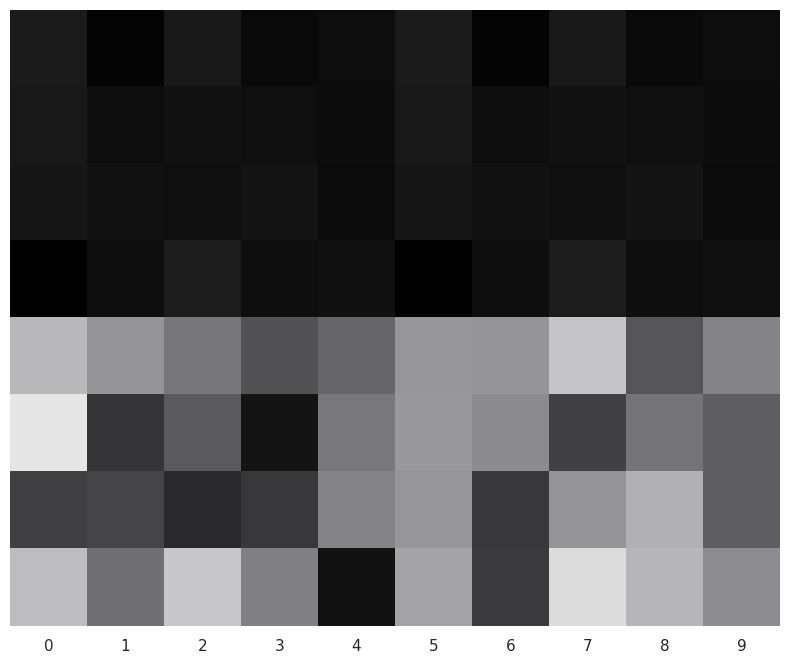

In [17]:
import seaborn
import numpy as np
seaborn.set(rc={'figure.figsize':(14,8)})
n = model.weights[-2].numpy()
p = []
for i in range(8):
    k = n[i*32:(i+1)*32]
    p.append(sum(k)/len(k))
p = np.array((p))
p = np.hstack([p,p])
k = p[:4,:]
t = -2*np.random.rand(4,10)
p = np.vstack([k,t])
p_norm = np.around(np.abs(p - p.mean(0)) / p.ptp(0),1)
cmap = seaborn.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
seaborn.heatmap(p,annot=False,yticklabels=False,square=True,cbar=0,cmap=cmap)

In [8]:
results[1][345][-1,:]

array([ 7.7174125,  3.3119195,  2.9841895,  5.965846 ,  4.022089 ,
        7.33944  ,  8.149606 ,  5.633972 ,  6.8736744,  7.576437 ,
        4.974008 ,  4.838466 ,  4.8363776,  4.8131967,  5.792042 ,
        4.7962446,  6.2136197,  7.111219 ,  5.9077044,  5.4461846,
        5.926796 ,  3.2269247, 15.857726 ,  5.9101405,  4.8012424,
        2.7803447,  6.531365 ,  4.8421335,  4.4232764,  5.824171 ,
        5.109007 ,  4.3453083,  5.751611 ,  6.8706493,  3.7231247,
        5.141843 , 22.766727 , 23.662052 ,  5.098215 , 14.32801  ,
        6.5163217, 36.206615 , 22.331533 ], dtype=float32)

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(classification_report(p_predicts,outputs))

                          precision    recall  f1-score   support

                 Apparel       0.00      0.00      0.00         0
              Automotive       0.56      0.03      0.05     32449
                    Baby       0.00      0.00      0.00         0
                  Beauty       0.00      0.00      0.00         0
                   Books       0.00      0.00      0.00         0
                  Camera       0.00      0.00      0.00         0
  Digital_Ebook_Purchase       0.00      0.00      0.00         0
  Digital_Music_Purchase       0.00      0.00      0.00         0
        Digital_Software       0.00      0.00      0.00         0
  Digital_Video_Download       0.00      0.00      0.00         0
     Digital_Video_Games       0.00      0.00      0.00         0
             Electronics       0.00      0.00      0.00         0
               Furniture       0.00      0.00      0.00         0
               Gift Card       0.00      0.00      0.00         0
         

In [86]:
b = model.weights[-2].numpy()
b.shape

(256, 5)

In [18]:
a = model.weights[6].numpy()
b = model.weights[-2].numpy()
c=np.dot(a.T,b).T

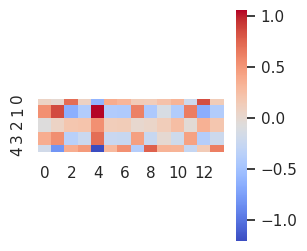

In [69]:
import seaborn
import numpy as np
seaborn.set()
# n = c
# p = []
# for i in range(8):
#     k = n[i*32:(i+1)*32]
#     p.append(sum(k)/len(k))
# p = np.array((p))
# p_norm = np.around(np.abs(p - p.mean(0)) / p.ptp(0),1)
# print(p)
y_axis_labels = "the mouse and keyboard combo".split()[::-1]
x_axis_labels = "comfortable click and instant input, features a scroll wheel and an easily portable size".split()
cmap = seaborn.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
seaborn.heatmap((-1*c[:,0:len(x_axis_labels)]+1)/10,square=True,cmap="coolwarm")

In [7]:
performance1 = [26.54,31.24]
performance2 = [15.74,24.7]
performance3 = [67.17,68.8]
diff = [((p[-1]-p[0])/p[0])*100 for p in [performance1,performance2,performance3]]
diff

[17.70911831198191, 56.92503176620075, 2.426678576745564]

[(26.54, 15.74, 67.17), (31.24, 24.7, 68.8)]


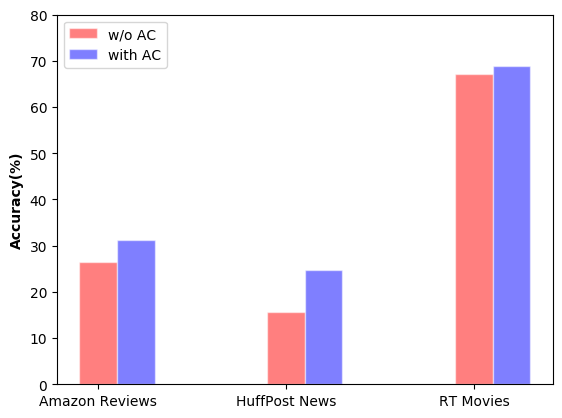

In [53]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Amazon Reviews','HuffPost News','RT Movies')
barWidth = 0.2
r1 = np.arange(len(objects))
r2 = [x + barWidth for x in r1]

axes = plt.gca()
axes.set_ylim([0,80])
performance1 = [26.54,31.24]
performance2 = [15.74,24.7]
performance3 = [67.17,68.8]
zipped = list(zip(performance1,performance2,performance3))
print(zipped)
plt.bar(r1, zipped[0], color='red',align='center', alpha=0.5,width=barWidth, edgecolor='white', label='w/o AC')
plt.bar(r2, zipped[1], color='blue',align='center', alpha=0.5,width=barWidth, edgecolor='white', label='with AC')

axes = plt.gca()
axes.set_ylim([0,80])
plt.xticks(r1, objects)
plt.ylabel('Accuracy(%)',fontweight='bold')
plt.legend()

plt.show()

In [71]:
[68.8,63.93,59.14,55.03][::-1]

[55.03, 59.14, 63.93, 68.8]

[(15.12, 15.03, 55.03), (20.42, 18.58, 59.14), (24.74, 22.62, 63.93), (31.24, 24.7, 68.8)]


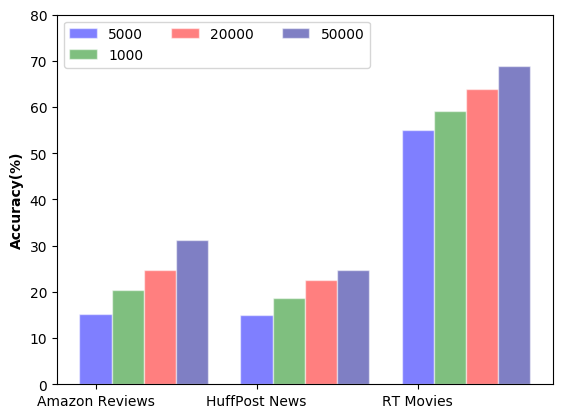

In [52]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Amazon Reviews','HuffPost News','RT Movies')
barWidth = 0.2
r1 = np.arange(len(objects))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

performance1 = [15.12,20.42,24.74,31.24]
performance2 = [24.7,22.62,18.58,15.03][::-1]
performance3 = [68.8,63.93,59.14,55.03][::-1]
zipped = list(zip(performance1,performance2,performance3))
print(zipped)
plt.bar(r1, zipped[0], color='blue',align='center', alpha=0.5,width=barWidth, edgecolor='white', label='5000')
plt.bar(r2, zipped[1], color='green',align='center', alpha=0.5,width=barWidth, edgecolor='white', label='1000')
plt.bar(r3, zipped[2], color='red',align='center', alpha=0.5,width=barWidth, edgecolor='white', label='20000')
plt.bar(r4, zipped[3], color='darkblue',align='center', alpha=0.5,width=barWidth, edgecolor='white', label='50000')

axes = plt.gca()
axes.set_ylim([0,80])
plt.xticks(r1, objects)
plt.ylabel('Accuracy(%)',fontweight='bold')
plt.legend(ncol=3)

plt.show()

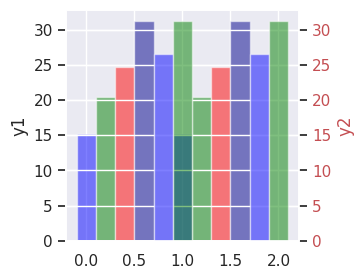

In [61]:
y1=[15.12,20.42,24.74,31.24]
y2=[26.54,31.24]
barWidth = 0.2
r1 = np.arange(2)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.bar(r1, y1[0], color='blue',align='center', alpha=0.5,width=barWidth, edgecolor='white', label='5000')
plt.bar(r2, y1[1], color='green',align='center', alpha=0.5,width=barWidth, edgecolor='white', label='1000')
plt.bar(r3, y1[2], color='red',align='center', alpha=0.5,width=barWidth, edgecolor='white', label='20000')
plt.bar(r4, y1[3], color='darkblue',align='center', alpha=0.5,width=barWidth, edgecolor='white', label='50000')
ax1.set_ylabel('y1')

ax2 = ax1.twinx()
plt.bar(r5, y2[0], color='blue',align='center', alpha=0.5,width=barWidth, edgecolor='white', label='5000')
plt.bar(r6, y2[1], color='green',align='center', alpha=0.5,width=barWidth, edgecolor='white', label='1000')
ax2.set_ylabel('y2', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

Text(0.5, 0, 'Activation Function')

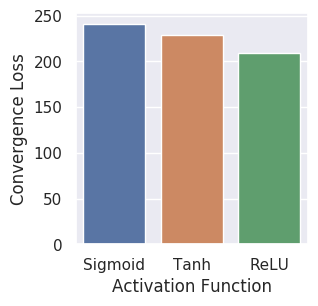

In [28]:
import pandas as pd
seaborn.set(rc={'figure.figsize':(3,3)})
d = {'labels': ["Sigmoid", "Tanh", "ReLU"], "Convergence Loss": [240.5,228.4,209.6]}
df = pd.DataFrame(data=d)
ax = seaborn.barplot(x='labels', y='Convergence Loss', data=df)
ax.set_xlabel('Activation Function')

Text(0.5, 0, 'Number of Dense Units')

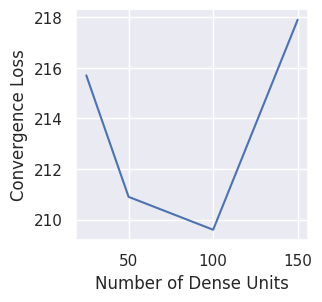

In [57]:
import pandas as pd
seaborn.set(rc={'figure.figsize':(3,3)})
d = {'labels': [25,50,100,150], "Convergence Loss": [215.7,210.9,209.6,217.9]}
df = pd.DataFrame(data=d)
ax = seaborn.lineplot(x="labels", y="Convergence Loss",
                  data=df)
ax.set_xlabel('Number of Dense Units')

In [ ]:
import pandas as pd
seaborn.set(rc={'figure.figsize':(3,3)})
d = {'labels': [50,100,200,300], "Convergence Loss": [209.6,216.1,219,222.6][::-1]}
df = pd.DataFrame(data=d)
ax = seaborn.lineplot(x="labels", y="Convergence Loss",
                  data=df)
ax.set_xlabel('Embedding Layer Size')